Introducción
============

Propósito del proyecto [1]
--------------------------

Es bien sabido de todos —se quiera o no reconocer abiertamente— que en
nuestro tiempo, y ya desde hace bastantes décadas, se estima, fomenta y
premia casi exclusivamente al especialista, sea cual sea la materia en
que se afane y procure destacar. No hace falta sino comparar los
currículos recientes de las enseñanzas medias y universitarias con los
de hace medio siglo o un siglo para reconocer esta exacerbada tendencia
a menoscabar la unidad del saber en aras de una cada vez más temprana
profundización en sus disciplinas particulares.

Se pierde mucho con esta moda, que, desde luego, no es ni parece que
vaya a ser veleidad pasajera. Se pierde, sobre todo, la capacidad de
establecer conexiones y diálogos fructíferos entre materias
aparentemente dispares; se cierra la posibilidad de encontrar
satisfacción en la intersección de los caminos, en esa tierra fértil
anterior a la separación de todos ellos hacia su propio peculiar
devenir, casi siempre intransitable excepto para el especialista.

Este texto es, primariamente, un intento —contra el espíritu de nuestro
tiempo— de mostrar el interés que el diálogo entre teoría de la música y
pensamiento computacional pueda tener para cualquiera que se considere
habitante, por pasión o trabajo, de uno de ambos reinos.

Su objetivo concreto es fomentar el pensamiento abstracto a través de
algo tan concreto como la elaboración de un programa informático para la
automatización del análisis tradicional de acordes, a un nivel —dicho
sea desde el principio— muy primitivo.

El propósito es, pues, eminentemente didáctico. Se trata de hacer ver
que los procesos de abstracción involucrados en la creación de un
programa ayudan a sistematizar e iluminar ciertas parcelas de la
disciplina del saber a que se aplican, aquí la teoría tradicional de la
música. Se trata también de demostrar la importancia que para el
programador tiene el conocimiento preciso de la materia en torno al cual
desarrolla sus programas.

El resultado es, ciertamente, un programa, o —como dirían los
programadores— un prototipo inicial de un programa futuro. Pero la
intención última de este trabajo es la exposición del proceso a partir
del cual se llega a construir ese programa o cualquier otro de esa
clase. Sistemas avanzados de inteligencia artificial, como ChatGPT,
podrán llegar a generar programas como éste sin intervención humana,
pero —de momento— no parece que esté en el horizonte de sus
posibilidades enseñar el proceso de abstracción e investigación que para
un ser humano puede requerir la creación de un programa informático
relacionado con un asunto de su interés. Y es este proceso creativo y
sistemático lo que interesa, ante todo, mostrar.

Dado el carácter pedagógico del trabajo, cualquier estudiante de música
o de programación es potencial lector del mismo. Los requisitos son
rudimentarios. Basta un conocimiento básico de los elementos de teoría
musical elemental y la capacidad de abstracción que se supone adquirida
en las enseñanzas medias. No se presuponen conocimientos previos de
programación, aunque naturalmente ayudan. Si el lector no es programador
o no conoce el lenguaje de programación Python, no será capaz de seguir
el detalle de la solución propuesta, pero sí de entender a grandes
rasgos cómo se va construyendo. El interesado puede seguir profundizando
por su cuenta en este sentido. En todo caso, no descarto la posibilidad
de transitar por derroteros más técnicos en futuras ediciones de este
documento, si las hubiere.

El texto debe mucho de su inspiración al planteamiento del excelente
libro *How to Design Programs*, en particular, lo que allí se llama
*design recipe*. No dude el lector en trabajar cuidadosamente sobre él
si quiere ahondar en el campo de la programación [2].

Observaciones al código
-----------------------

La exposición del código es lineal, esto es, el código surge tal como
aparece en su versión final a la par que se desarrolla la reflexión que
lo motiva y lo documenta.

En la práctica de la programación no es este el camino habitual y casi
nunca el deseable. Antes bien, un programa se desarrolla
*iterativamente*. Es decir, su forma final es el resultado de múltiples
refinamientos de su diseño e implementación.

Por ejemplo, la función `analyze_chord` generaba, en su primera versión,
un análisis del acorde dado. En el estudio de los casos de uso de la
función se descubrió, más tarde, que puede haber acordes cuyo análisis
no sea posible, lo que obligó a extender el conjunto de resultados
válidos y a modificar la implementación de la función de modo que
englobase esas recién descubiertas posibilidades.

Otro ejemplo, las constantes que, en la exposición lineal del código,
aparecen antes que las definiciones de funciones, se escribieron a
medida que resultaron necesarias para el diseño de esas mismas
funciones.

Este documento, puesto que es un texto con un principio, un desarrollo y
un fin, no puede representar fielmente este carácter iterativo del
desarrollo de los programas.

Por otro lado, las baterías de tests no son siempre completas. Un
programa con intención de ser fiable debe contar con una cobertura mayor
de los casos de uso.

Tampoco se han incluido las cadenas de documentación de las funciones
(*docstrings*), a pesar de que en todo código bien construido deben
estar presentes. Puesto que el propio texto documenta completamente cada
una de estas funciones, habría resultado perturbadoramente redundante
sobrecargarlas con *docstrings*.

Por su parte, las categorías de acordes codificadas son sólo algunas de
las muchas posibles. Las recogidas sirven para presentar el asunto, pero
en ningún modo constituyen un conjunto exhaustivo.

Finalmente, no se exploran otras representaciones posibles de los
objetos del problema, ni se plantean otras formas de organización del
código, como, por ejemplo, la orientación a objetos o la modularización,
asuntos estos importantes para el programador, pero no esenciales para
el propósito fundamental del texto.

El problema, su dominio y representación
========================================

Planteamiento del problema
--------------------------

Un problema habitual en la teoría tradicional de la música es el
*análisis de acordes*. Por ejemplo, dado el siguiente *acorde*

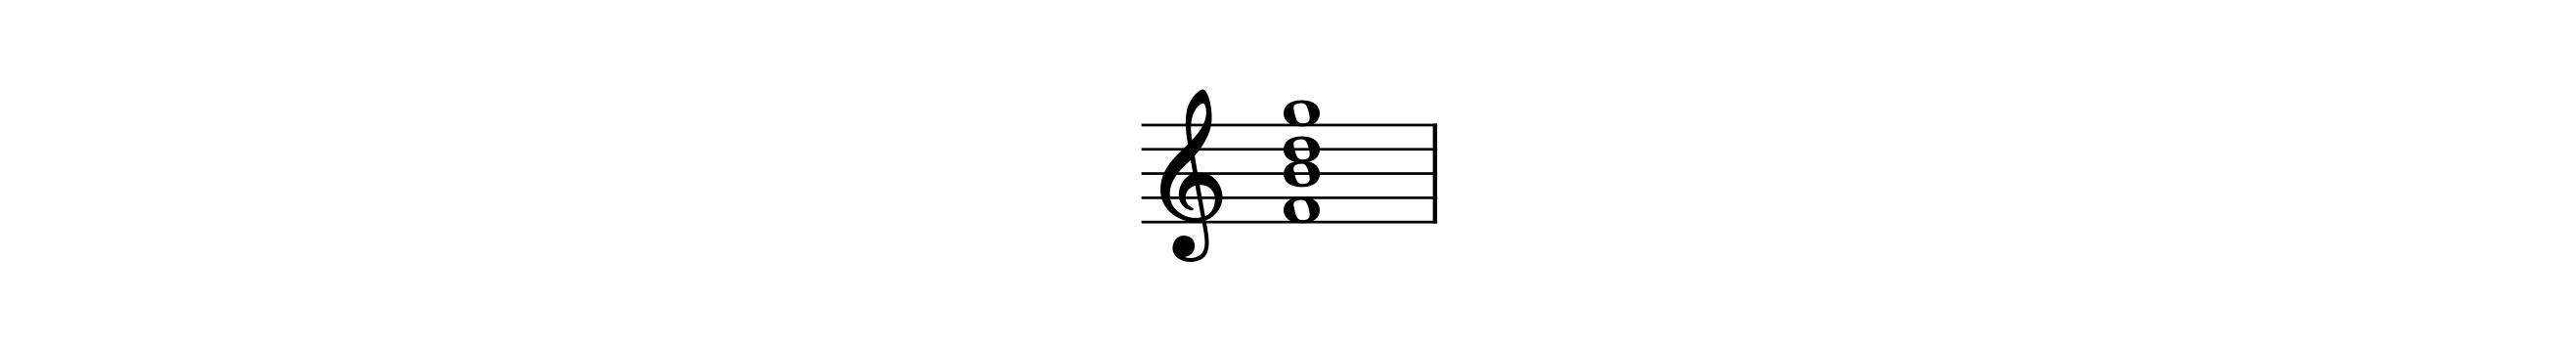

su análisis nos proporciona información de este tipo:

-   el bajo del acorde es la nota fa;
-   la fundamental del acorde es la nota sol;
-   está en tercera *inversión*;
-   pertenece a la *categoría* de acordes de séptima de dominante;
-   se puede simbolizar o cifrar como `G7/F`.

El dominio del problema
-----------------------

Antes de poder siquiera imaginar una forma de atacar este problema, es
necesario explorar y comprender el dominio en el que se plantea. Dicha
exploración tiene como primer objetivo determinar con qué clase de
objetos vamos a tratar en la búsqueda de una solución computacional al
problema planteado.

La descripción inicial apuntada alude ya a distintas clases de entidades
y conceptos —destacados en cursiva en su exposición— que forman parte de
su dominio, el dominio de la teoría musical.

Si profundizamos algo más en la exploración de este campo, se van
perfilando otras clases de objetos relacionados, con los cuales
tendremos que tratar.

Para empezar, las *notas* que integran los acordes son, en el análisis
armónico, entes abstractos, en el sentido de que se ignora tanto su
altura concreta como su duración. Al analista le interesa solo lo que
queda de la nota tras esa abstracción inicial; esto es, su mero nombre,
que es la sílaba o *letra* —en la simbolización internacional— que la
designa y su *accidente* o alteración.

Conviene saber, además, que las notas no alteradas son las siete notas
de la escala de do mayor, a las que, aparte de su sílaba o *letra*, se
les suele asignar un número, útil para ciertos propósitos en el campo de
la teoría; llamémosle, a falta de un vocablo universalmente aceptado, el
*número de la letra* o número diatónico.

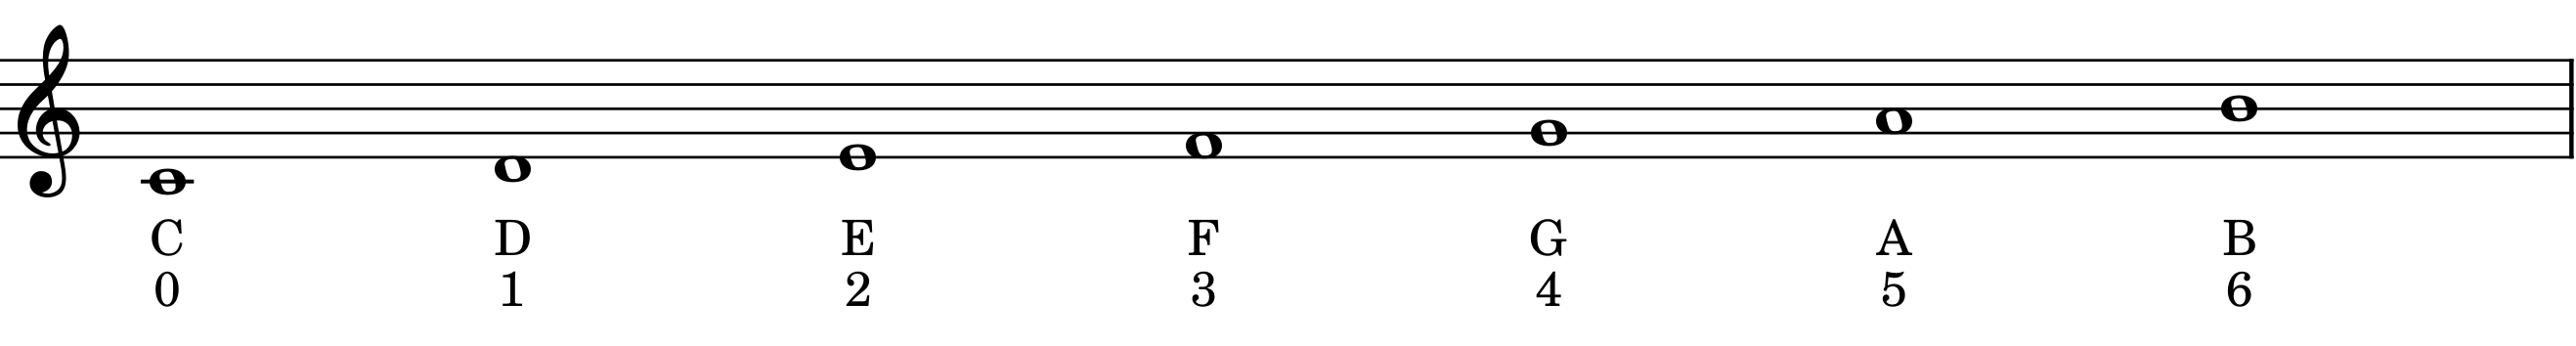

En el análisis es igualmente importante considerar la secuencia de las
doce notas comprendidas en el ámbito de una octava. Cada una de ellas se
denomina técnicamente una *clase de altura* y es costumbre designarlas
mediante un número, ya que notas con nombres diferentes pueden
pertenecer a la misma clase de altura.



Por otra parte, debemos tener en cuenta que el análisis de acordes tiene
relación estrecha con el *análisis de* los *intervalos* que se forman
entre sus notas, con el *patrón interválico* que cada acorde presenta.

En la teoría de la música los intervalos se analizan por su *número* o
grado y por su especie o *cualidad*.

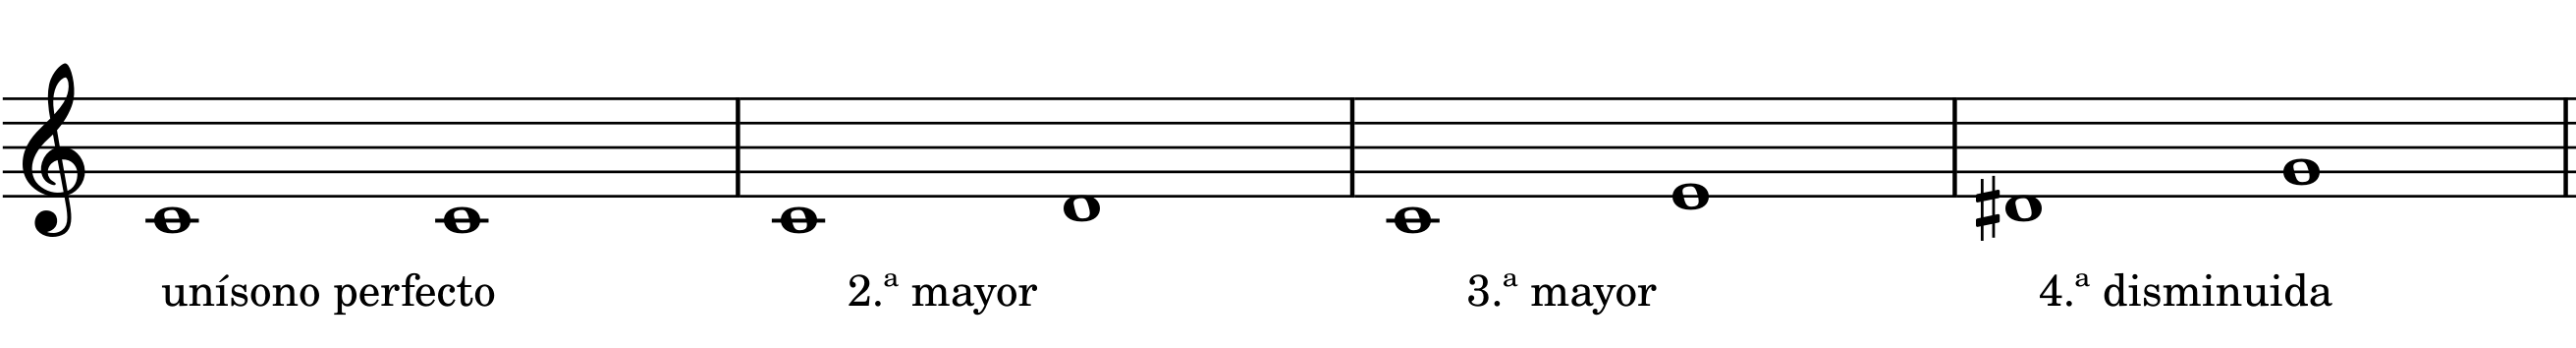

En cuanto a los acordes mismos, la teoría musical los describe desde
múltiples puntos de vista.

Para el propósito que nos compete habrá que considerar su *inversión*

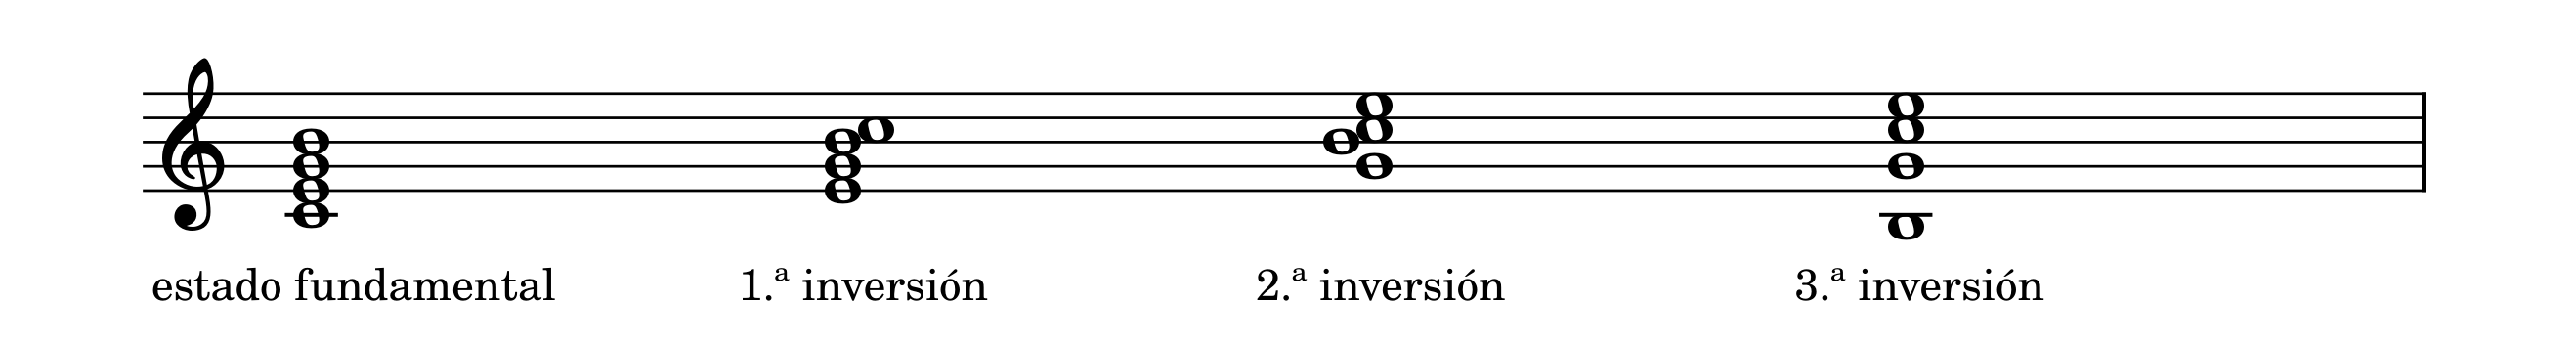

y su *categoría*.

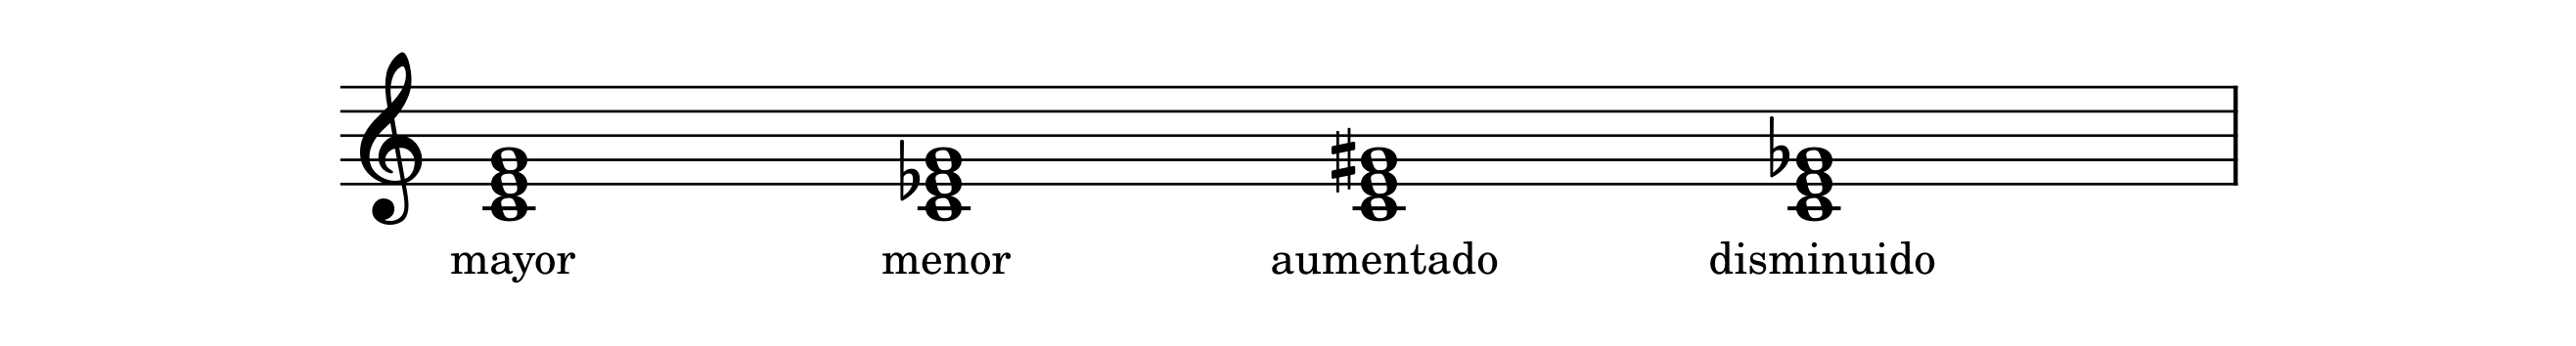

Todos estos conceptos forman parte fundamental del dominio del problema
y, en consecuencia, estarán presentes, de una forma u otra, en
cualquiera de sus posibles soluciones.

Representación de la información del dominio
--------------------------------------------

Es tarea inicial en la creación de programas establecer claramente la
forma de representación, dentro del programa mismo, de los elementos
relevantes que pertenecen al dominio del problema en cuestión.

Es importante señalar que no hay una única manera de representar estos
elementos del dominio. En todo caso, es crucial que nuestra
representación capte sus características esenciales por lo que respecta
al problema que tratamos de resolver.

Listemos resumidamente los elementos señalados en la descripción de la
sección anterior.

1.  Relativos a las notas:

    -   nota,
    -   letra,
    -   número de letra,
    -   accidente,
    -   clase de altura.

2.  Relativos a las agrupaciones de notas

    -   en intervalos:
        -   intervalo,
        -   número de intervalo,
        -   cualidad de intervalo,
        -   análisis de intervalo;
    -   en acordes:
        -   acorde,
        -   inversión de acorde,
        -   categoría de acorde,
        -   análisis de acorde.

Nuestro objetivo ahora es formular con los medios del lenguaje de
programación que elegimos, aquí Python, representaciones unívocas y bien
delimitadas de las entidades de teoría musical que acabamos de explorar.

El siguiente código pone a nuestra disposición diversos constructos de
Python encaminados a cumplir este propósito. Para facilitar la
exposición subsiguiente, se incluyen también los instrumentos necesarios
para la implementación y verificación de la corrección de nuestra
solución, de nuestro programa. Se introduce todo ello aquí sin mayor
comentario. Tómelo el lector como un conjunto de dispositivos que un
*deus ex machina* nos proporciona de antemano para poder realizar de
forma concreta nuestro trabajo.

In [1]:
from collections import namedtuple
from itertools import permutations
from typing import (
    Any, List, Literal, Mapping, Optional, Sequence, Tuple,
    cast
)

from ordered_set import OrderedSet
from bidict import bidict

import pytest
import ipytest # for testing on Jupyter Notebook

### Las notas y clases de altura

Podemos representar una *nota* (*note*)[3] como un grupo de dos
elementos (duplo) denominados *letra* (*letter*) y *accidente*
(*accidental*), donde la letra que designa a la nota es una de las siete
letras de la escala diatónica de do mayor antes comentadas, es decir,
las letras de la ‘A’ a la ‘G’, ambas incluidas:

| letra | representación |
|-------|----------------|
| C     | `'C'`          |
| D     | `'D'`          |
| E     | `'E'`          |
| F     | `'F'`          |
| G     | `'G'`          |
| A     | `'A'`          |
| B     | `'B'`          |

y donde su accidente es el nombre del accidente (en inglés):

| accidente       | representación   |
|-----------------|------------------|
| doble bemol     | `'double_flat'`  |
| bemol           | `'flat'`         |
| sin alteración  | `'natural'`      |
| sostenido       | `'sharp'`        |
| doble sostenido | `'double_sharp'` |

Un *número de letra* (*letter number*) se representará evidentemente
como uno de las siete números del 0 al 6, ambos incluidos.

Por su parte, una *clase de altura* (*pitchclass*) se deja representar,
también inmediatamente, por el número que convencionalmente se utiliza
para designarla, un número del 0 al 11.

El conjunto de estas representaciones en Python se puede codificar de la
siguiente manera.

In [2]:
# Note
Letter = Literal['A', 'B', 'C', 'D', 'E', 'F', 'G']
Accidental = Literal[
    'double_flat', 'flat', 'natural',
    'sharp', 'double_sharp'
]
Note = namedtuple('Note', ['letter', 'accidental'])
LetterNumber = Literal[0, 1, 2, 3, 4, 5, 6]
Pitchclass = Literal[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

### Los intervalos y su análisis

Por su parte, un *intervalo* (*interval*) puede representarse como un
grupo de dos notas, denominadas *grave* (*low*) y *aguda* (*high*).

Un *número de intervalo* (*interval number*) se representaría con un
número entre 1 y 7, ambos incluidos, donde 1 significa el unísono, 2 la
segunda, 3 la tercera, etc.:

| número de intervalo | representación |
|---------------------|----------------|
| unísono             | `1`            |
| 2.ª                 | `2`            |
| 3.ª                 | `3`            |
| 4.ª                 | `4`            |
| 5.ª                 | `5`            |
| 6.ª                 | `6`            |
| 7.ª                 | `7`            |

La *cualidad de intervalo* (*interval quality*) se representaría con el
nombre en inglés que la teoría de la música emplea para las diversas
cualidades:

| cualidad de intervalo | representación        |
|-----------------------|-----------------------|
| doble disminuido      | `'double_diminished'` |
| disminuido            | `'diminished'`        |
| menor                 | `'minor'`             |
| mayor                 | `'major'`             |
| aumentado             | `'augmented'`         |
| doble aumentado       | `'double_augmented'`  |

Un *análisis de intervalo* puede representarse como un duplo cuyos
miembros se denominan *número* (*number*) y *cualidad* (*quality*).

Finalmente, un *patrón interválico* (*interval pattern*) es una
secuencia ordenada de análisis de intervalos. En algunos casos
especiales y muy poco frecuentes, un intervalo puede resultar
inanalizable. Se debe permitir que *opcionalmente* un patrón interválico
pueda contener algún elemento que, dicho coloquialmente, sea *nada*
(*none*), en lugar de un análisis de intervalo.

Este conjunto de definiciones se pueda expresar en Python como sigue:

In [3]:
# Interval
Interval = namedtuple('Interval', ['low', 'high'])
IntervalNumber = Literal[1, 2, 3, 4, 5, 6, 7]
IntervalQuality = Literal[
    'double_diminished', 'diminished', 'minor', 'perfect',
    'major', 'augmented', 'double_augmented'
]
IntervalAnalysis = namedtuple('IntervalAnalysis', ['number', 'quality'])
IntervalPattern = Tuple[Optional[IntervalAnalysis], ...]

### Los acordes y su análisis

Un *acorde* (*chord*) es un conjunto ordenado (*oredered set*) de notas
y como tal puede representarse. Conviene señalar que en el análisis
importa el orden del bajo con respecto a las notas por encima de él,
pero no el orden de estas últimas notas. Por ejemplo, desde el punto de
vista de la armonía tradicional estos acordes son el mismo acorde:

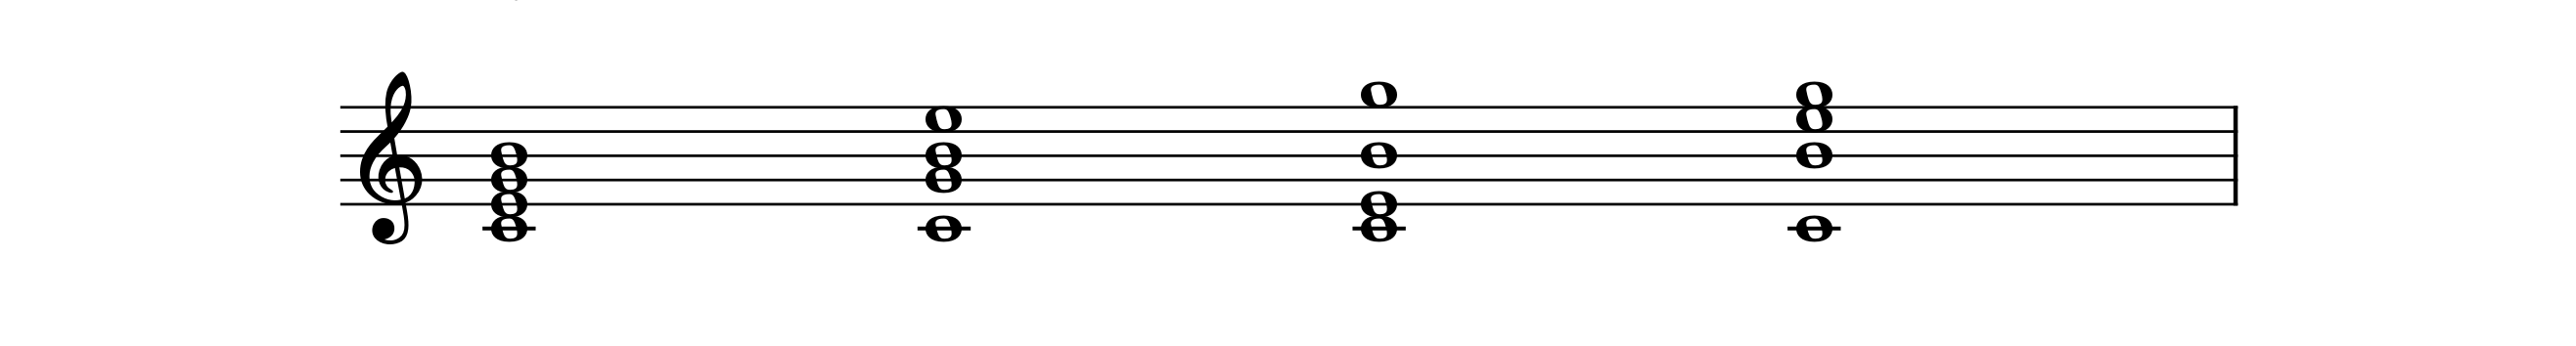

No obstante, con el fin de que la representación no se aparte demasiado
de la forma habitual en que se explican y expresan informalmente los
acordes, consideramos todas sus notas ordenadas.

También es importante destacar que cuando hablamos de conjunto
sobrentendemos que los elementos del conjunto no se repiten, lo que
encaja con la propia teoría musical tradicional, donde la duplicación
(en distintas octavas) de las notas de un acorde no tiene significación
armónica.

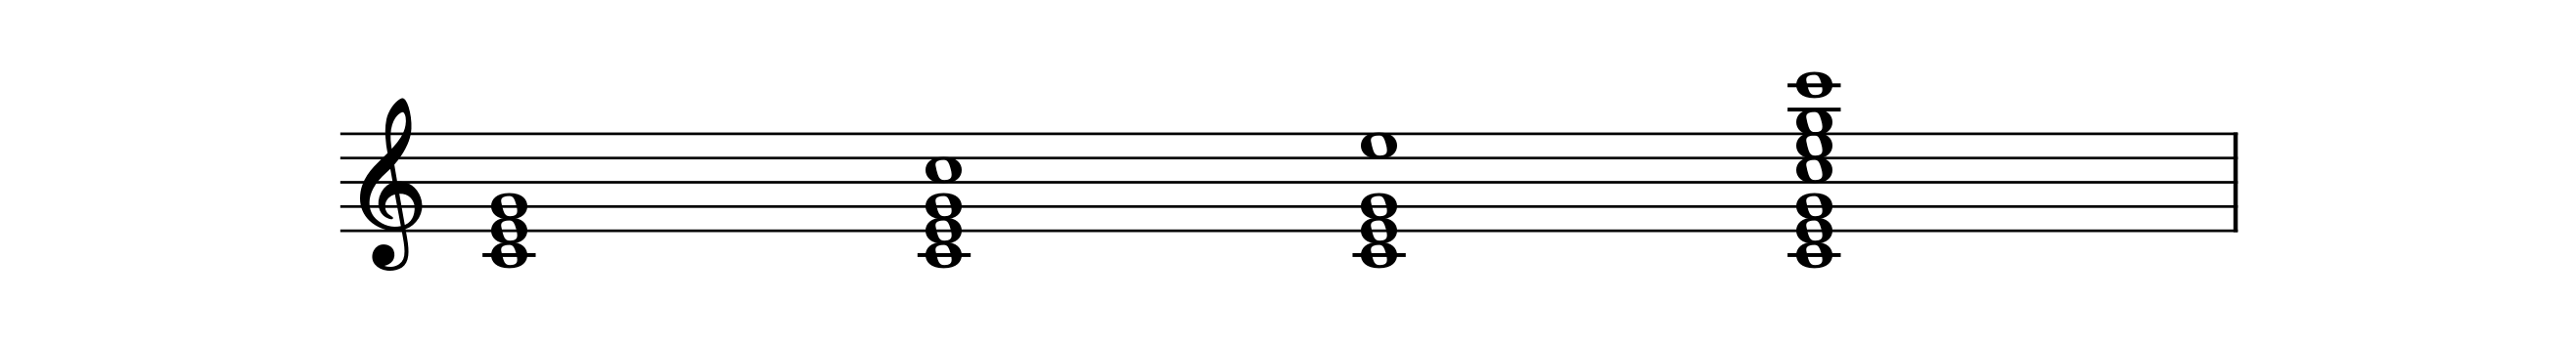

La *inversión de un acorde* (*chord inversion*), cuyo número está
limitado por el número de notas diatónicas, se puede representar
fácilmente con un número del 0 al 6, donde 0 significaría el estado
fundamental.

| inversión          | representación |
|--------------------|----------------|
| estado fundamental | `0`            |
| 1.ª inversión      | `1`            |
| 2.ª inversión      | `2`            |
| 3.ª inversión      | `3`            |
| 4.ª inversión      | `4`            |
| 5.ª inversión      | `5`            |
| 6.ª inversión      | `6`            |

La *categoría de un acorde* (*chord category*) es uno de los nombres
asignados convencionalmente a un acorde para indicar a qué clase
pertenece. Por ejemplo, categoría de *séptima de dominante*, de acorde
*aumentado*, etcétera. Lo representaremos, por lo pronto, como una
cadena de texto (*string*, abreviadamente *str*), es decir, de una forma
puramente genérica, ya que el número y denominación de las categorías
que decidamos implementar puede variar en versiones futuras del
programa.

Finalmente, un *análisis de acorde* (*chord analysis*) es un registro
que contiene información sobre el acorde, donde cada entrada de
información asocia (*maps*) una palabra, que designa el tipo de
información de que se trata, con el valor que corresponda para esa clase
de información al acorde del caso.

Todos estas descripciones se pueden expresar en Python como sigue:

In [4]:
# Chord
Chord = OrderedSet[Note]
ChordInversion = Literal[0, 1, 2, 3, 4, 5, 6]
ChordCategory = str
ChordAnalysis = Mapping[str, Any]

Ejemplos de representación
--------------------------

A continuación se muestran ejemplos de representación de algunos de los
elementos considerados, cuyos tipos han sido formalmente definidos en
los bloques de código precedentes.

| nota          | representación              |
|---------------|-----------------------------|
| C             | `Note['C', 'natural']`      |
| E$\flat\flat$ | `Note['E', 'double_flat']`  |
| G$\flat$      | `Note['G', 'flat']`         |
| A$\sharp$     | `Note['A', 'sharp']`        |
| F$\times$     | `Note['F', 'double_sharp']` |

| intervalo          | representación                                       |
|--------------------|------------------------------------------------------|
| C$\sharp$–E$\flat$ | `Interval[Note['C', 'sharp'], Note['E', 'flat']]`    |
| D–A$\sharp$        | `Interval[Note['D', 'natural'], Note['A', 'sharp']]` |

| análisis de intervalo | representación                             |
|-----------------------|--------------------------------------------|
| unísono perfecto      | `IntervalAnalysis[1, 'perfect']`           |
| 2.ª mayor             | `IntervalAnalysis[2, 'major']`             |
| 3.ª menor             | `IntervalAnalysis[3, 'minor']`             |
| 4.ª aumentada         | `IntervalAnalysis[4, 'augmented']`         |
| 5.ª disminuida        | `IntervalAnalysis[5, 'diminished']`        |
| 6.ª doble aumentada   | `IntervalAnalysis[6, 'double_augmented']`  |
| 7.ª doble disminuida  | `IntervalAnalysis[7, 'double_diminished']` |

| acorde                | representación                                                        |
|-----------------------|-----------------------------------------------------------------------|
| C–E$\flat$–G$\flat$   | `Chord[Note['C', 'natural'], Note['E' 'flat'], Note['G', 'flat']]`    |
| D–F$\sharp$–A$\sharp$ | `Chord[Note['D', 'natural'], Note['F', 'sharp'], Note['A', 'sharp']]` |

Terminemos esta sección con un ejemplo de representación de un análisis
de acorde.

    {
        'bass': Note['E', 'flat'],
        'root': Note['C', 'natural'],
        'inversion': 1,
        'category': minor,
        'symbol': 'C-/Eb'
    }

Tablas de consulta
------------------

En relación con los tipos de objetos definidos, será necesario disponer
de algunas tablas de consulta, que asocian unos elementos con otros o
con ciertos valores de utilidad en el desarrollo del programa.

Para empezar, es conveniente asociar nuestros elementos con su
representación simbólica convencional o abreviada.

Así, los signos utilizados para referirse a los accidentes de una nota:

| accidente      | símbolo |
|----------------|---------|
| `double_flat`  | `bb`    |
| `flat`         | `b`     |
| `sharp`        | `#`     |
| `double_sharp` | `x`     |

En Python:

In [5]:
# Music symbols
ACCIDENTAL_SYMBOLS: bidict[Accidental, str] = bidict({
    'double_flat': 'bb',
    'flat': 'b',
    'natural': '',
    'sharp': '#',
    'double_sharp': 'x'
})

De modos semejante pueden asociarse las categorías de un acorde con los
símbolos que se refieren a ellas en el cifrado americano:

| categoría de acorde  | símbolo |
|----------------------|---------|
| `major`              |         |
| `minor`              | `-`     |
| `augmented`          | `+`     |
| `diminished`         | `-b5`   |
| `half_diminished`    | `-7b5`  |
| `dominant_seventh`   | `7`     |
| `major_seventh`      | `maj7`  |
| `minor_seventh`      | `-7`    |
| `diminished_seventh` | `o`     |
| `suspended_fourth`   | `sus4`  |
| `suspended_second`   | `sus2`  |

En Python:

In [6]:
CHORD_CATEGORY_SYMBOLS: Mapping[ChordCategory, str] = {
    'major': '',
    'minor': '-',
    'augmented': '+',
    'diminished': '-b5',
    'half_diminished': '-7b5',
    'dominant_seventh': '7',
    'major_seventh': 'maj7',
    'minor_seventh': '-7',
    'diminished_seventh': 'o',
    'suspended_fourth': 'sus4',
    'suspended_second': 'sus2',
}

Asimismo, asociamos las cualidades de intervalos con su abreviatura en
inglés:

| cualidad de intervalo | símbolo |
|-----------------------|---------|
| `double_diminished`   | `dd`    |
| `diminished`          | `d`     |
| `minor`               | `m`     |
| `perfect`             | `P`     |
| `major`               | `M`     |
| `augmented`           | `A`     |
| `double_augmented`    | `AA`    |

En Python:

In [7]:
INTERVAL_QUALITY_SYMBOLS: bidict[IntervalQuality, str] = bidict({
    'double_diminished': 'dd',
    'diminished': 'd',
    'minor': 'm',
    'perfect': 'P',
    'major': 'M',
    'augmented': 'A',
    'double_augmented': 'AA'
})

Junto con estas correspondencias entre objetos y sus símbolos
(abreviaturas) convencionales, nos serán de utilidad también las
siguientes tres tablas.

En la primera se relaciona cada accidente con el desplazamiento en
número de semitonos que implica con respecto a la nota natural. Por
ejemplo, un doble sostenido implica un desplazamiento de dos semitonos
más con respecto a la nota no alterada, mientras que un bemol implica un
desplazamiento de un semitono menos con respecto a la nota natural.

| accidente      | offset en semitonos |
|----------------|---------------------|
| `double_flat`  | -2                  |
| `flat`         | -1                  |
| `natural`      | 0                   |
| `sharp`        | 1                   |
| `double_sharp` | 2                   |

En Python:

In [8]:
# Accidental distance in semitones wrt. natural
ACCIDENTAL_OFFSETS: Mapping[Accidental, int] = {
    'double_flat': -2,
    'flat': -1,
    'natural': 0,
    'sharp': 1,
    'double_sharp': 2
}

La segunda tabla relaciona un número de intervalo y un número de
semitonos con una determinada cualidad interválica.

| número de intervalo | semitonos | cualidad de intervalo |
|---------------------|-----------|-----------------------|
| `1`                 | -2        | `double_diminished`   |
| `1`                 | -1        | `diminished`          |
| `1`                 | 0         | `perfect`             |
| `1`                 | 1         | `augmented`           |
| `1`                 | 2         | `double_augmented`    |
| `2`                 | -1        | `double_diminished`   |
| `2`                 | 0         | `diminished`          |
| `2`                 | 1         | `minor`               |
| `2`                 | 2         | `major`               |
| `2`                 | 3         | `augmented`           |
| `2`                 | 4         | `double_augmented`    |
| `3`                 | 1         | `double_diminished`   |
| `3`                 | 2         | `diminished`          |
| `3`                 | 3         | `minor`               |
| `3`                 | 4         | `major`               |
| `3`                 | 5         | `augmented`           |
| `3`                 | 6         | `double_augmented`    |
| `4`                 | 3         | `double_diminished`   |
| `4`                 | 4         | `diminished`          |
| `4`                 | 5         | `perfect`             |
| `4`                 | 6         | `augmented`           |
| `4`                 | 7         | `double_augmented`    |
| `5`                 | 5         | `double_diminished`   |
| `5`                 | 6         | `diminished`          |
| `5`                 | 7         | `perfect`             |
| `5`                 | 8         | `augmented`           |
| `5`                 | 9         | `double_augmented`    |
| `6`                 | 6         | `double_diminished`   |
| `6`                 | 7         | `diminished`          |
| `6`                 | 8         | `minor`               |
| `6`                 | 9         | `major`               |
| `6`                 | 10        | `augmented`           |
| `6`                 | 11        | `double_augmented`    |
| `7`                 | 8         | `double_diminished`   |
| `7`                 | 9         | `diminished`          |
| `7`                 | 10        | `minor`               |
| `7`                 | 11        | `major`               |
| `7`                 | 12        | `augmented`           |
| `7`                 | 13        | `double_augmented`    |

En Python:

In [9]:
# Interval qualities by interval number and semitones
INTERVAL_QUALITIES: Mapping[
    IntervalNumber,
    Mapping[int, IntervalQuality]] = {
    1: {-2: 'double_diminished',
        -1: 'diminished',
        0: 'perfect',
        1: 'augmented',
        2: 'double_augmented'
    },
    2: {-1: 'double_diminished',
        0: 'diminished',
        1: 'minor',
        2: 'major',
        3: 'augmented',
        4: 'double_augmented'
    },
    3: {1: 'double_diminished',
        2: 'diminished',
        3: 'minor',
        4: 'major',
        5: 'augmented',
        6: 'double_augmented'
    },
    4: {3: 'double_diminished',
        4: 'diminished',
        5: 'perfect',
        6: 'augmented',
        7: 'double_augmented'
    },
    5: {5: 'double_diminished',
        6: 'diminished',
        7: 'perfect',
        8: 'augmented',
        9: 'double_augmented'
    },
    6: {6: 'double_diminished',
        7: 'diminished',
        8: 'minor',
        9: 'major',
        10: 'augmented',
        11: 'double_augmented'
    },
    7: {8: 'double_diminished',
        9: 'diminished',
        10: 'minor',
        11: 'major',
        12: 'augmented',
        13: 'double_augmented'
    }
}

Finalmente, la tercera tabla asocia patrones interválicos con un nombre
convencional de categoría de acordes.

| patrón interválico                        | categoría            |
|-------------------------------------------|----------------------|
| 3.ª mayor, 5.ª justa                      | `major`              |
| 3.ª mayor                                 | `major`              |
| 3.ª menor, 5.ª justa                      | `minor`              |
| 3.ª menor                                 | `minor`              |
| 3.ª mayor, 5.ª aumentada                  | `augmented`          |
| 3.ª menor, 5.ª disminuida                 | `diminished`         |
| 3.ª menor, 5.ª disminuida, 7.ª menor      | `half_diminished`    |
| 3.ª mayor, 5.ª justa, 7.ª menor           | `dominant_seventh`   |
| 3.ª mayor, 7.ª menor                      | `dominant_seventh`   |
| 3.ª mayor, 5.ª justa, 7.ª mayor           | `major_seventh`      |
| 3.ª mayor, 7.ª mayor                      | `major_seventh`      |
| 3.ª menor, 5.ª justa, 7.ª menor           | `minor_seventh`      |
| 3.ª menor, 7.ª menor                      | `minor_seventh`      |
| 3.ª menor, 5.ª disminuida, 7.ª disminuida | `diminished_seventh` |
| 4.ª justa, 5.ª justa                      | `suspended fourth`   |
| 2.ª mayor, 5.ª justa                      | `suspended second`   |

En Python:

In [10]:
# Chord Interval Patterns and Categories
MAJOR = (
    IntervalAnalysis(3, 'major'),
    IntervalAnalysis(5, 'perfect')
)
MAJOR_NO5TH = (
    IntervalAnalysis(3, 'major'),
)
MINOR = (
    IntervalAnalysis(3, 'minor'),
    IntervalAnalysis(5, 'perfect')
)
MINOR_NO5TH = (
    IntervalAnalysis(3, 'minor'),
)
AUGMENTED = (
    IntervalAnalysis(3, 'major'),
    IntervalAnalysis(5, 'augmented')
)
DIMINISHED = (
    IntervalAnalysis(3, 'minor'),
    IntervalAnalysis(5, 'diminished')
)
HALF_DIMINISHED = (
    IntervalAnalysis(3, 'minor'),
    IntervalAnalysis(5, 'diminished'),
    IntervalAnalysis(7, 'minor')
)
DOMINANT_SEVENTH = (
    IntervalAnalysis(3, 'major'),
    IntervalAnalysis(5, 'perfect'),
    IntervalAnalysis(7, 'minor')
)
DOMINANT_SEVENTH_NO5TH = (
    IntervalAnalysis(3, 'major'),
    IntervalAnalysis(7, 'minor')
)
MAJOR_SEVENTH = (
    IntervalAnalysis(3, 'major'),
    IntervalAnalysis(5, 'perfect'),
    IntervalAnalysis(7, 'major')
)
MAJOR_SEVENTH_NO5TH = (
    IntervalAnalysis(3, 'major'),
    IntervalAnalysis(7, 'major')
)
MINOR_SEVENTH = (
    IntervalAnalysis(3, 'minor'),
    IntervalAnalysis(5, 'perfect'),
    IntervalAnalysis(7, 'minor')
)
MINOR_SEVENTH_NO5TH = (
    IntervalAnalysis(3, 'minor'),
    IntervalAnalysis(7, 'minor')
)
DIMINISHED_SEVENTH = (
    IntervalAnalysis(3, 'minor'),
    IntervalAnalysis(5, 'diminished'),
    IntervalAnalysis(7, 'diminished')
)
SUSPENDED_FOURTH = (
    IntervalAnalysis(4, 'perfect'),
    IntervalAnalysis(5, 'perfect')
)
SUSPENDED_SECOND = (
    IntervalAnalysis(2, 'major'),
    IntervalAnalysis(5, 'perfect')
)

CHORD_CATEGORIES: Mapping[IntervalPattern, str] = {
    MAJOR: 'major',
    MAJOR_NO5TH: 'major',
    MINOR: 'minor',
    MINOR_NO5TH: 'minor',
    AUGMENTED: 'augmented',
    DIMINISHED: 'diminished',
    HALF_DIMINISHED: 'half_diminished',
    DOMINANT_SEVENTH: 'dominant_seventh',
    DOMINANT_SEVENTH_NO5TH: 'dominant_seventh',
    MAJOR_SEVENTH: 'major_seventh',
    MAJOR_SEVENTH_NO5TH: 'major_seventh',
    MINOR_SEVENTH: 'minor_seventh',
    MINOR_SEVENTH_NO5TH: 'minor_seventh',
    DIMINISHED_SEVENTH: 'diminished_seventh',
    SUSPENDED_FOURTH: 'suspended_fourth',
    SUSPENDED_SECOND: 'suspended_second'
}

Utensilios
==========

Cuando se trata de expresar ejemplos de las entidades del dominio de
nuestro problema, resulta laborioso tener que hacerlo conforme a
nuestras definiciones anteriores.

En efecto expresiones como

    Chord([Note('B', 'natural'),
           Note('D', 'natural'),
           Note('F', 'natural'),
           Note('G', 'natural')])

son ciertamente muy prolijas y tediosas de escribir. Mucho más fácil
sería expresar este acorde de una forma parecida a la siguiente:

    (B, D, F, G)

Con este objetivo hemos creado herramientas que convierten expresiones
sencillas de escribir en aquellas otras más complejas, que, de acuerdo con
nuestras definiciones previas, esperan y requieren las funciones de
nuestro programa. Con tales expresiones abreviadas escribiremos, a
partir de ahora, todos los ejemplos que vengan al caso, en la confianza
de que estas herramientas las convertirán a la representación formal
requerida.

Tales herramientas son evidentemente también funciones, cuyo propósito
es hacernos más fácil la escritura del código central del programa. No
nos detendremos en comentar su diseño y el código resultante.

In [11]:
# Utils
def test_note_from_string():
    assert note_from_string('A') == Note('A', 'natural')
    assert note_from_string('D#') == Note('D', 'sharp')
    assert note_from_string('Eb') == Note('E', 'flat')
    with pytest.raises(ValueError):
        note_from_string('M')
        note_from_string('A3')

def note_from_string(note_str: str) -> Note:
    letter = letter_from_string(note_str[0])
    accidental = accidental_from_string(note_str[1:])
    return Note(letter, accidental)

N = note_from_string # abbrev.

def test_letter_from_string():
    assert letter_from_string('A') == 'A'
    assert letter_from_string('B') == 'B'
    assert letter_from_string('C') == 'C'
    assert letter_from_string('D') == 'D'
    assert letter_from_string('E') == 'E'
    assert letter_from_string('F') == 'F'
    assert letter_from_string('G') == 'G'
    with pytest.raises(ValueError):
        letter_from_string('H')

def letter_from_string(letter_str: str) -> Letter:
    match letter_str:
        case 'A' | 'B' | 'C' | 'D' | 'E' | 'F' | 'G':
            return letter_str
        case _:
            raise ValueError('Invalid note letter')

def test_accidental_from_string():
    assert accidental_from_string('bb') == 'double_flat'
    assert accidental_from_string('b') == 'flat'
    assert accidental_from_string('') == 'natural'
    assert accidental_from_string('#') == 'sharp'
    assert accidental_from_string('x') == 'double_sharp'
    with pytest.raises(ValueError):
        accidental_from_string('3')

def accidental_from_string(accidental_str: str) -> Accidental:
    try:
        accidental = ACCIDENTAL_SYMBOLS.inverse[accidental_str]
    except KeyError as exc:
        raise ValueError('Invalid accidental') from exc
    return accidental

def test_chord_from_strings():
    assert (
        chord_from_strings('C', 'E')
        == Chord([N('C'), N('E')])
    )
    assert (
        chord_from_strings('G', 'B', 'F')
        == Chord([N('G'), N('B'), N('F')])
    )

def chord_from_strings(*note_strs: str) -> Chord:
    notes = [note_from_string(n) for n in note_strs]
    return Chord(notes)

C = chord_from_strings # abbrev.

def test_interval_from_strings():
    assert interval_from_strings('A', 'C') == Interval(N('A'), N('C'))
    assert interval_from_strings('C', 'A') == Interval(N('C'), N('A'))

def interval_from_strings(note_str1: str, note_str2: str) -> Interval:
    note1 = note_from_string(note_str1)
    note2 = note_from_string(note_str2)
    return Interval(note1, note2)

I = interval_from_strings # abbrev.

def test_interval_analysis_from_string():
    assert (
        interval_analysis_from_string('P1')
        == IntervalAnalysis(1, 'perfect')
    )
    assert (
        interval_analysis_from_string('M2')
        == IntervalAnalysis(2, 'major')
    )
    assert (
        interval_analysis_from_string('d5')
        == IntervalAnalysis(5, 'diminished')
    )
    assert (
        interval_analysis_from_string('A4')
        == IntervalAnalysis(4, 'augmented')
    )
    assert (
        interval_analysis_from_string('AA6')
        == IntervalAnalysis(6, 'double_augmented')
    )
    assert (
        interval_analysis_from_string('dd7')
        == IntervalAnalysis(7, 'double_diminished')
    )
    with pytest.raises(ValueError):
        interval_analysis_from_string('P9')
        interval_analysis_from_string('x1')

def interval_analysis_from_string(
    interval_analysis_str: str
) -> IntervalAnalysis:
    number = interval_number_from_string(interval_analysis_str[-1])
    quality = interval_quality_from_string(interval_analysis_str[:-1])
    return IntervalAnalysis(number, quality)

def test_interval_number_from_string():
    assert interval_number_from_string('1') == 1
    assert interval_number_from_string('2') == 2
    assert interval_number_from_string('3') == 3
    assert interval_number_from_string('4') == 4
    assert interval_number_from_string('5') == 5
    assert interval_number_from_string('6') == 6
    assert interval_number_from_string('7') == 7
    with pytest.raises(ValueError):
        interval_number_from_string('0')

def interval_number_from_string(
    interval_number_str: str
) -> IntervalNumber:
    number = int(interval_number_str)
    if number < 1 or number > 7:
        raise ValueError('Invalid interval number')
    return cast(IntervalNumber, number)

def test_interval_quality_from_string():
    assert interval_quality_from_string('dd') == 'double_diminished'
    assert interval_quality_from_string('d') == 'diminished'
    assert interval_quality_from_string('m') == 'minor'
    assert interval_quality_from_string('P') == 'perfect'
    assert interval_quality_from_string('M') == 'major'
    assert interval_quality_from_string('A') == 'augmented'
    assert interval_quality_from_string('AA') == 'double_augmented'
    with pytest.raises(ValueError):
        interval_quality_from_string('x')

def interval_quality_from_string(
    interval_quality_str: str
) -> IntervalQuality:
    try:
        quality = INTERVAL_QUALITY_SYMBOLS.inverse[interval_quality_str]
    except KeyError as exc:
        raise ValueError('Invalid interval quality') from exc
    return quality

IA = interval_analysis_from_string # abbrev.

def test_interval_pattern_from_strings():
    assert (
        interval_pattern_from_strings('M3', 'P5')
        == (IA('M3'), IA('P5'))
    )
    assert (
        interval_pattern_from_strings('m3', 'd5', 'm7')
        == (IA('m3'), IA('d5'), IA('m7'))
    )

def interval_pattern_from_strings(
    *interval_analysis_strs: str
) -> IntervalPattern:
    interval_analyses = [
        interval_analysis_from_string(i) for i in interval_analysis_strs
    ]
    return tuple(interval_analyses)

IP = interval_pattern_from_strings # abbrev.

Veamos algunos ejemplos de uso de estas formas de escritura abreviada.

| nota          | codificación abreviada |
|---------------|------------------------|
| C             | `N('C')`               |
| E$\flat\flat$ | `N('Ebb')`             |
| G$\flat$      | `N('Gb')`              |
| A$\sharp$     | `N('A#')`              |
| F$\times$     | `N('Fx')`              |

| intervalo          | codificación abreviada |
|--------------------|------------------------|
| C$\sharp$–E$\flat$ | `I('C#', 'Eb')`        |
| D–A$\sharp$        | `I('D', 'A#')`         |

| análisis de intervalo | codificación abreviada |
|-----------------------|------------------------|
| unísono perfecto      | `IA('P1')`             |
| 2.ª mayor             | `IA('M2')`             |
| 3.ª menor             | `IA('m3')`             |
| 4.ª aumentada         | `IA('A4')`             |
| 5.ª disminuida        | `IA('d5')`             |
| 6.ª doble aumentada   | `IA('AA6')`            |
| 7.ª doble disminuida  | `IA('dd7')`            |

| acorde                | codificación abreviada |
|-----------------------|------------------------|
| C–E$\flat$–G$\flat$   | `C('C', 'Eb', 'Gb')`   |
| D–F$\sharp$–A$\sharp$ | `C('D', 'F#', 'A#')`   |

| patrón interválico   | codificación abreviada |
|----------------------|------------------------|
| 3.ª major, 5.ª justa | `IP('M3', 'P5')`       |
| 3.ª menor, 7.ª menor | `IP('m3', 'm7')`       |

Solución al problema
====================

Conceptos generales en el diseño de programas
---------------------------------------------

### Funciones

En las secciones precedentes se ha explorado el dominio del problema, se
ha establecido una representación formal de sus elementos esenciales y
se han construido herramientas para la manipulación intuitiva y sencilla
de dichas formalizaciones. Con este bagaje es posible ya plantear la
solución del problema por medios computacionales.

Existen varios *estilos de programación* posibles y adecuados para
cumplir nuestro objetivo inicial. Aquí seguiremos el estilo *funcional*.
En esta forma de programar se definen *funciones* que expresan y
desempeñan las diversas tareas que habrán de realizarse. Una *función*
en un lenguaje de programación es, con ciertas excepciones, algo muy
semejante a lo que todos conocemos como funciones desde las matemáticas
escolares. Por ejemplo, consideremos la función $f(x)$ que suma 10 a un
número dado:

$$f(x) = x + 10, \forall x \in \mathbb{N}$$

Diremos que esta función *consume* un número natural $x$ y *produce* la
suma de ese mismo número y $10$. El resultado es otro número natural.

En Python podría escribirse así:

    def f(x: Natural) -> Natural:
        return x + 10
        

Un ejemplo de uso de esa función sería $f(5)$, donde la función $f$ se
*aplica* al *argumento* $5$. El resultado de esta aplicación cumple la
siguiente identidad: $f(5) = 15$; en Python: `f(5) == 15`.

La solución al problema del análisis de acordes consistiría en diseñar
una función que consuma un acorde y produzca un análisis del mismo. Si
llamamos a esta función `analyze_chord` (analizar acorde), una
aplicación de ella a un caso concreto de acorde sería, por ejemplo,

    analyze_chord(C('F','G', 'B', 'D'))

y el resultado de esta aplicación debería asemejarse al siguiente
registro:

    {
        'bass': N('F'), 
        'root': N('G'), 
        'inversion': 3
        'category': 'dominant_seventh'
        'symbol': 'G7/F'
    }

### Ejemplos

Podemos —y debemos— formular esta clase de ejemplos de uso de la función
que queremos diseñar, antes de implementarla. Tales ejemplos no sólo
permiten hacerse una idea clara del tipo de datos que la función consume
y produce, sino que también expresan para cada ejemplo el resultado que
debería producirse.

Consideremos unos pocos casos de aplicación de la función
`analyze_chord`.

El acorde

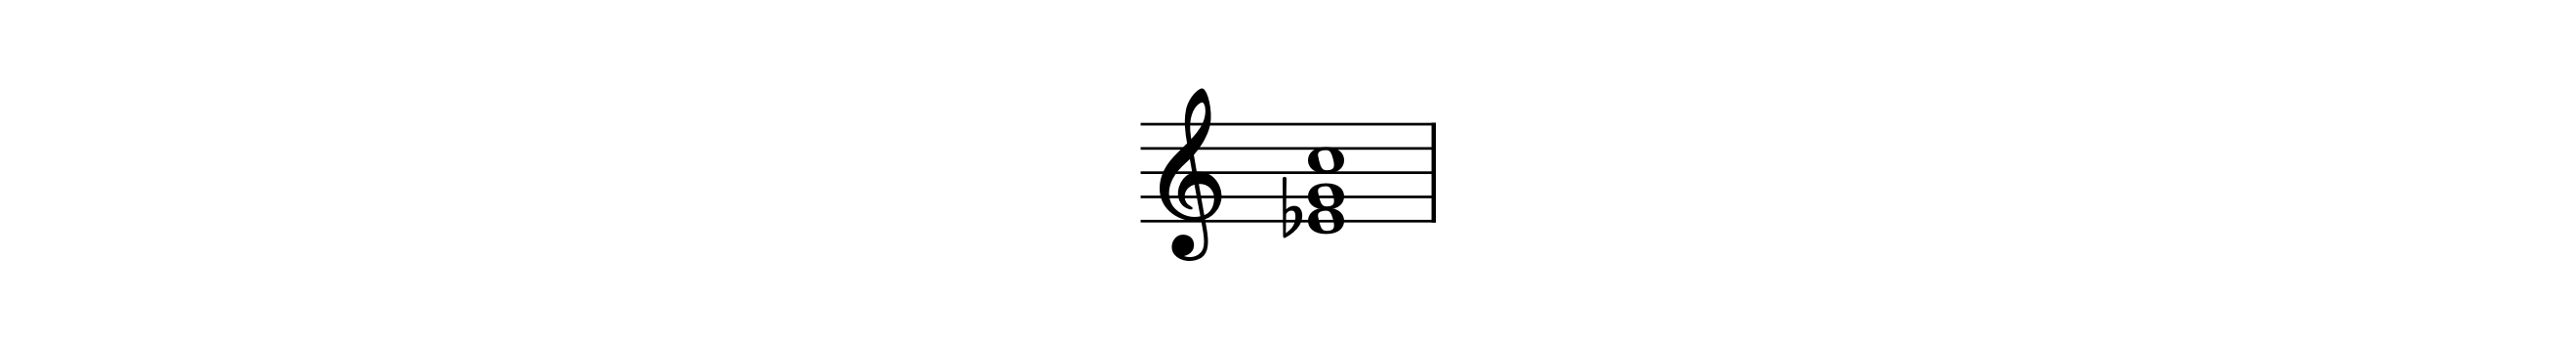

es un acorde de do menor en primera inversión (con bajo en mi$\flat$);

el acorde

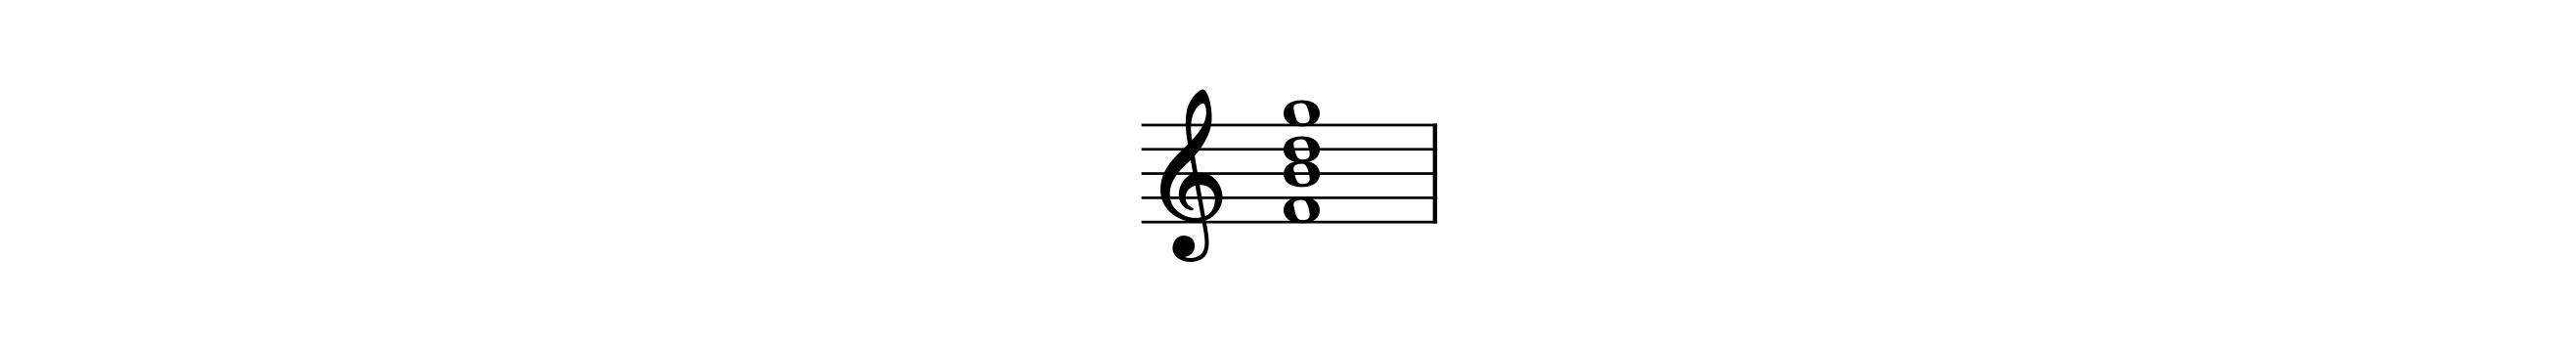

es un acorde de séptima de dominante de sol, en tercera inversión (con
bajo en fa).

Algo menos evidente es el siguiente acorde:

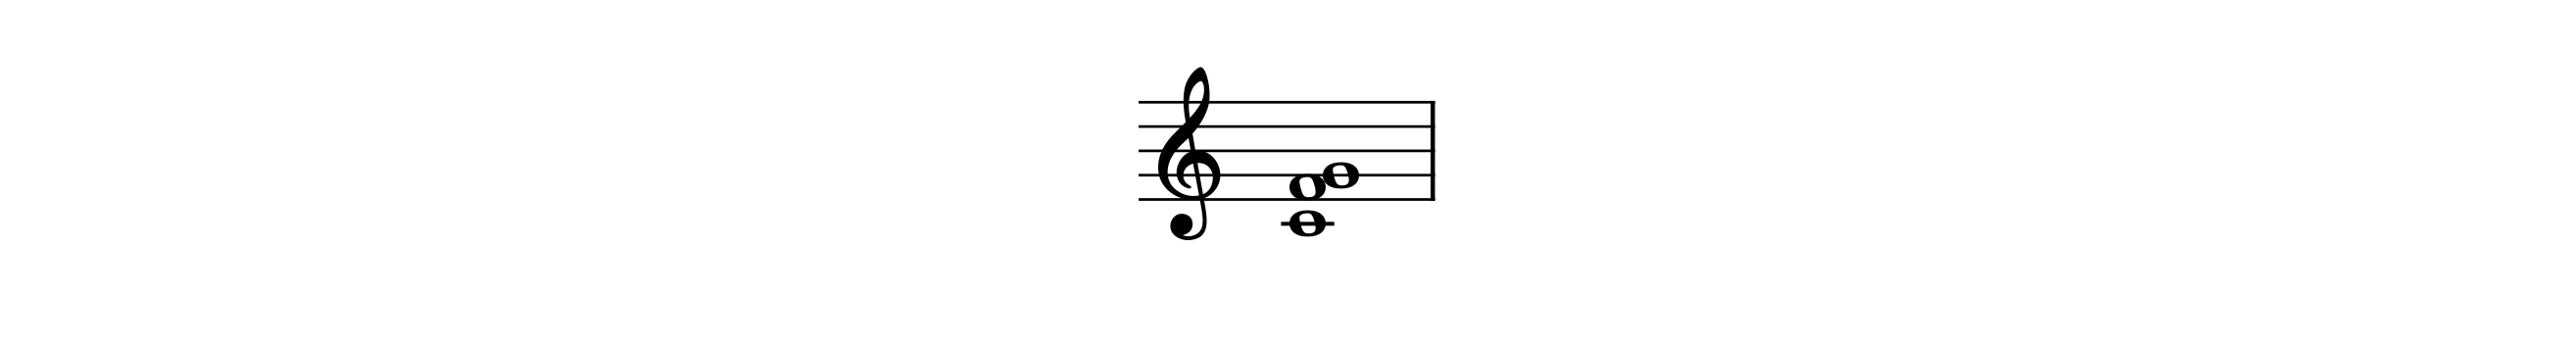

En efecto, este acorde puede analizarse como un acorde de do con cuarta
suspendida (sus4) o bien como uno de fa con segunda suspendida (sus2) y
en segunda inversión.

Finalmente, el acorde

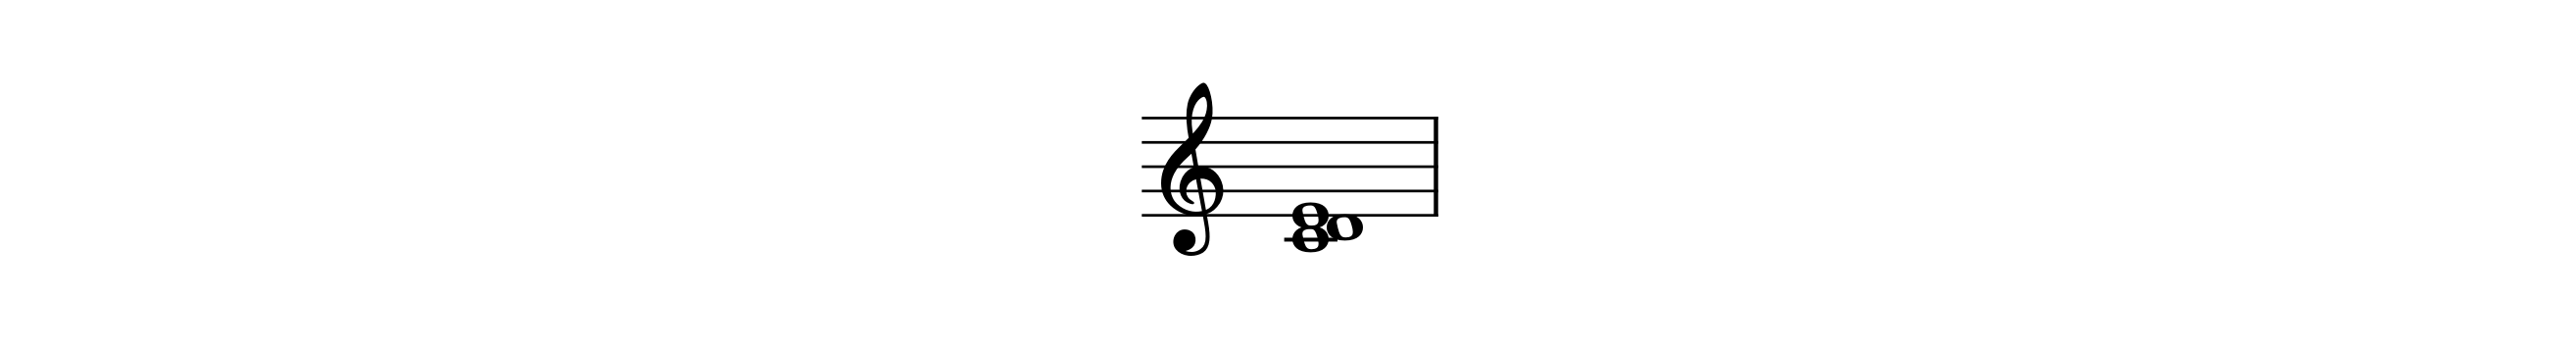

no se deja analizar, al menos si se consideran los categorías comunes de
acordes anteriormente tabuladas. Su análisis no produce ningún
resultado.

En definitiva, aunque el tipo de dato del argumento de la función es, en
todos los casos, un acorde. su resultado no encaja siempre con lo que
hemos formalizado como un `ChordAnalysis`.

Ahora bien, si se piensa un poco más despacio, sí es posible captar el
resultado del análisis de todos estos ejemplos bajo un mismo prisma. En
efecto, en todos los casos comentados lo que obtenemos es una secuencia
de análisis de acordes, ya sea un único análisis (secuencia con un único
un elemento), un análisis múltiple (secuencia con varios elementos) o
ningún análisis (secuencia vacía). Así pues, una lista, que es un tipo
de secuencia, puede utilizarse como valor final de la función
`analyze_chord`. Cuando del acorde dado sólo es posible un único
análisis, la función producirá una lista con ese análisis como único
elemento; cuando es posible una multiplicidad de análisis, la lista
resultante los contendrá todos. Si no es posible analizar el acorde
enteramente, el resultado será una lista vacía.

### Tests

Los ejemplos se expresan también en forma de *aserciones*, enunciados
que afirman que la aplicación de la función a un argumento en concreto
produce un resultado particular. A su vez, estas aserciones se pueden
agrupar bajo una función especial de verificación (*test*) para la
función del caso. Si nuestra implementación es incorrecta, alguna o
varias de nuestras aserciones no se sostendrán y la función de
verificación nos informará al respecto. En caso contrario, la función
implementada *aprobará el test*.

Procedamos a crear funciones de verificación de `analyze_chord` a partir
de los ejemplos comentados y de algunos otros.

In [12]:
# Core functions
def test_analyze_chord():
    assert (
        analyze_chord(C('C', 'E', 'G'))
        == [{
            'bass': N('C'),
            'root': N('C'),
            'inversion': 0,
            'category': 'major',
            'symbol': 'C'
        }]
    )
    assert (
        analyze_chord(C('Eb', 'C', 'G'))
        == [{
            'bass': N('Eb'),
            'root': N('C'),
            'inversion': 1,
            'category': 'minor',
            'symbol': 'C-/Eb'
        }]
    )
    assert (
        analyze_chord(C('G#', 'E', 'C'))
        == [{
            'bass': N('G#'),
            'root': N('C'),
            'inversion': 2,
            'category': 'augmented',
            'symbol': 'C+/G#'
        }]
    )
    assert (
        analyze_chord(C('Db', 'Abb', 'Fb'))
        == [{
            'bass': N('Db'),
            'root': N('Db'),
            'inversion': 0,
            'category': 'diminished',
            'symbol': 'Db-b5'
        }]
    )
    assert (
        analyze_chord(C('C', 'G', 'A'))
        == [{
            'bass': N('C'),
            'root': N('A'),
            'inversion': 1,
            'category': 'minor_seventh',
            'symbol': 'A-7/C'
        }]
    )
    assert (
        analyze_chord(C('D', 'F#', 'C#', 'A'))
        == [{
            'bass': N('D'),
            'root': N('D'),
            'inversion': 0,
            'category': 'major_seventh',
            'symbol': 'Dmaj7'
        }]
    )
    assert (
        analyze_chord(C('F', 'B', 'D', 'G'))
        == [{
            'bass': N('F'),
            'root': N('G'),
            'inversion': 3,
            'category': 'dominant_seventh',
            'symbol': 'G7/F'
        }]
    )
    assert (
        analyze_chord(C('B', 'D', 'F', 'A'))
        == [{
            'bass': N('B'),
            'root': N('B'),
            'inversion': 0,
            'category': 'half_diminished',
            'symbol': 'B-7b5'
        }]
    )
    assert (
        analyze_chord(C('G#', 'B', 'D', 'F'))
        == [{
            'bass': N('G#'),
            'root': N('G#'),
            'inversion': 0,
            'category': 'diminished_seventh',
            'symbol': 'G#o'
        }]
    )
    assert (
        analyze_chord(C('C', 'F', 'G')) # multiple analysis
        == [{
            'bass': N('C'),
            'root': N('C'),
            'inversion': 0,
            'category': 'suspended_fourth',
            'symbol': 'Csus4'
            },
            {
            'bass': N('C'),
            'root': N('F'),
            'inversion': 2,
            'category': 'suspended_second',
            'symbol': 'Fsus2/C'
            },
        ]
    )
    assert not analyze_chord(C('C', 'D', 'E')) # unknown chord

Análisis de acordes
-------------------

En teoría de la música tradicional el análisis de un acorde consiste
básicamente en encontrar una disposición de sus notas tal que su patrón
interválico se ajuste al patrón interválico de alguna de las categorías
conocidas de acordes.

Veamos un ejemplo.

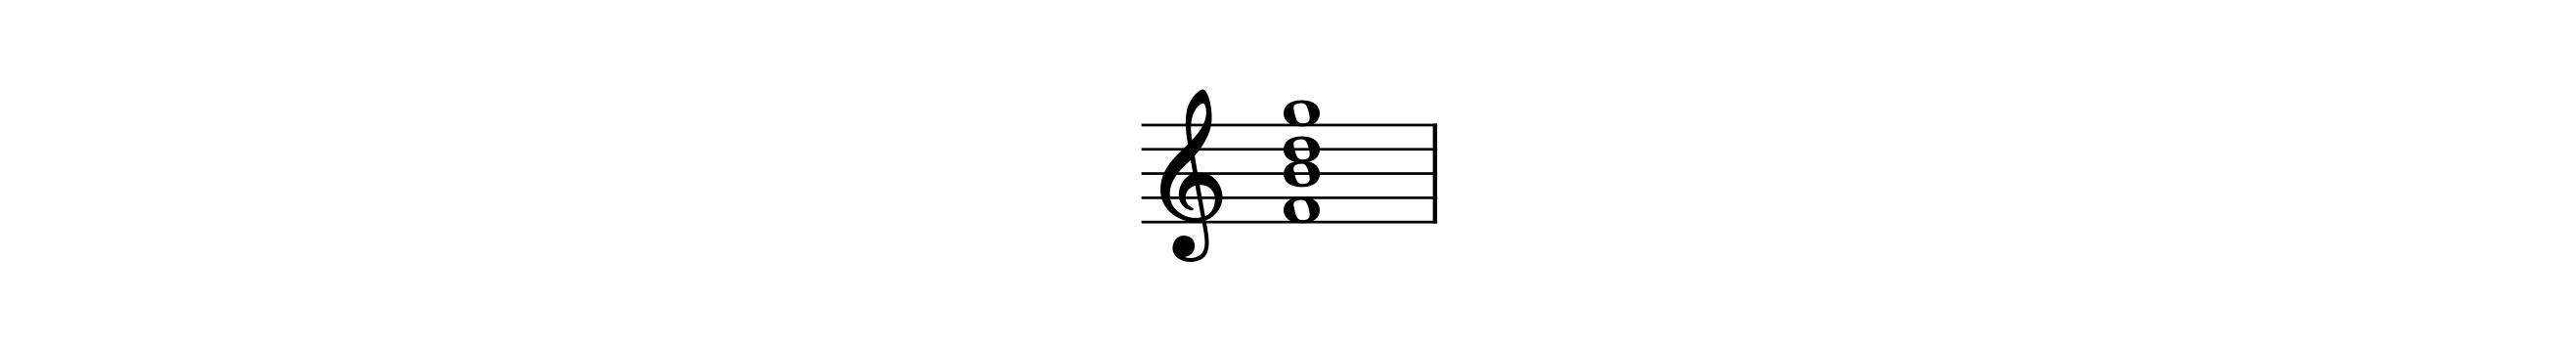

Las notas de este acorde se puede reordenar como un acorde formado por
terceras superpuestas.

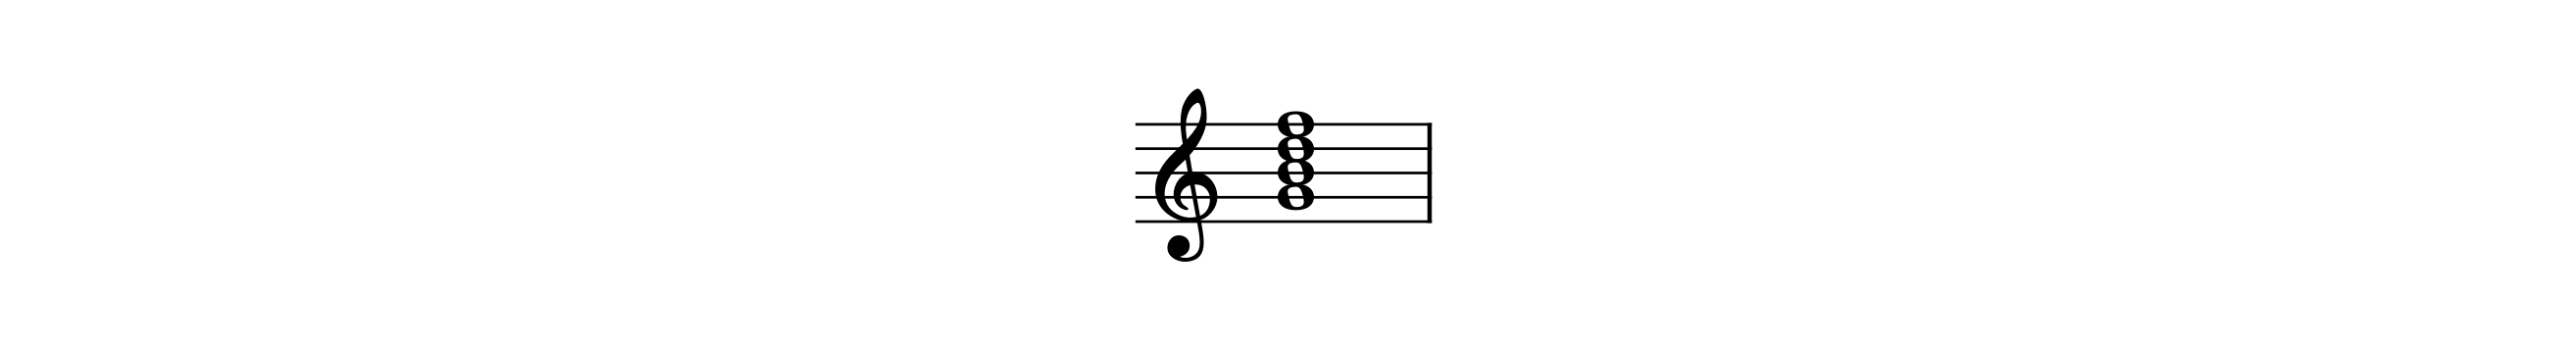

El análisis de los intervalos que se forman entre el bajo de esta
disposición y cada una de las otras notas por encima de él es el
siguiente:

1.  tercera mayor (intervalo entre sol y si);
2.  quinta justa (intervalo entre sol y re);
3.  séptima menor (intervalo entre sol y fa).

El patrón tercera mayor (*major third*) – quinta justa (*perfect fifth*)
– séptima menor (*minor seventh*), que, abreviadamente en inglés,
podemos escribir como `M3, P5, m7`, es el que caracteriza la categoría
de los acordes de *séptima de dominante* (*dominant\_seventh*).

De la observación del acorde original y de aquella disposición de sus
notas que encaja con una determinada categoría de acordes obtenemos
además el resto de la información relevante, a saber:

-   El bajo del acorde original es fa.
-   La fundamental del acorde es el bajo de la disposición hallada
    (sol).
-   Puesto que la *tercera* nota en esta disposición, la nota fa, es el
    bajo del acorde original, se dice que el acorde está en *tercera*
    inversión.

Además, el símbolo del acorde se construye a partir de su fundamental,
su categoría y su bajo, para producir el cifrado `G7/F`, donde `G` es el
nombre de la fundamental; `7`, el símbolo de la categoría *séptima de
dominante* y `/F` el signo para indicar que su bajo es `F`.

La solución de nuestro problema inicial se reduce, pues, a diseñar e
implementar la función `analyze_chord` de tal manera que realice las
operaciones que acabamos de describir.

Una posible implementación de `analyze_chord` que se amolda a la
descripción anterior podría expresarse de esta manera más precisa:

Por cada una de las posibles disposiciones de las notas del acorde
(*chord arrangements*) compárese su patrón interválico (*chord pattern*)
con cada uno de los patrones interválicos de las categorías de acordes
conocidas (*category pattern*). En el caso de que ambos patrones
coincidan, se obtienen:

1.  el bajo (*bass*) del acorde que se está analizando;
2.  la fundamental (*root*) de dicho acorde, que es el bajo de la
    disposición coincidente;
3.  la inversión (*inversion*) del acorde, a partir de su bajo y de su
    fundamental;
4.  la categoría (*category*) del acorde, que es la que corresponde al
    patrón interválico de la disposición coincidente; y  
5.  el símbolo (*symbol*) del acorde, a partir de su fundamental,
    categoría y bajo.

Estos cinco valores sirven para construir un análisis de acorde. El
resultado del análisis será la lista de todos los análisis de las
disposiciones de las notas del acorde que encajen con las categorías
existentes; si no hay ninguna coincidencia, el resultado del análisis
será una lista vacía.

In [13]:
def analyze_chord(chord: Chord) -> Sequence[ChordAnalysis]:
    analyses: List[ChordAnalysis] = []
    category_patterns = CHORD_CATEGORIES.keys()
    candidates = chord_arrangements(chord)
    for candidate in candidates:
        candidate_pattern = get_chord_pattern(candidate)
        if candidate_pattern in category_patterns:
            bass = get_bass(chord)
            root = get_bass(candidate)
            inversion = get_inversion(root, bass)
            category = get_category(candidate_pattern)
            symbol = build_chord_symbol(root, category, bass)
            analysis = {
                'bass': bass,
                'root': root,
                'inversion': inversion,
                'category': category,
                'symbol': symbol
            }
            analyses.append(analysis)
    return analyses

La lista de funciones de ayuda
------------------------------

Se advertirá que en la definición de la función `analyze_chord` hacemos
referencia a otras funciones que vamos a necesitar para que el resultado
sea el deseado. Dicho en otras palabras, en la definición de una función
es habitual y buena práctica referir otras funciones de ayuda —y
aplicarlas a los argumentos que corresponda—, dando por hecho que ya
existen y que realizan correctamente su propósito. Estas funciones
deseadas pasan a formar parte de lo que algunos autores denominan *lista
de deseos* (*wish list*) de funciones.

En Python, podemos formular esa lista de funciones mediante esquemas
(*stubs*) de ellas, donde consten, aparte de su nombres, los tipos de
datos que consumen y producen[4].

``` python
def chord_arrangements(chord: Chord) -> List(Chord):
    pass

def get_chord_pattern(chord: Chord) -> IntervalPattern:
    pass

def get_bass(chord: Chord) -> Note:
    pass

def get_inversion(root: Note, bass: Note) -> ChordInversion:
    pass 

def get_category(interval_pattern: IntervalPattern) -> ChordCategory:
    pass

def build_chord_symbol(
    root: Note, category: ChordCategory, bass: Note
) -> str:
    pass
```

Sobra decir que la solución final se obtiene cuando cada una de las
funciones de esta lista se implementa correctamente. El lector atento se
habrá percatado ya de que en ese proceso podremos encontrarnos con otras
funciones de ayuda de estas funciones de ayuda citadas y de que esta
forma de proceder se repite recursivamente, hasta que no queda ninguna
función secundaria por implementar.

Disposiciones de un acorde
--------------------------

La función `chord_arrangements` debe producir todas las disposiciones
posibles del acorde dado.

Por ejemplo, para un acorde de dos notas estas disposiciones son:

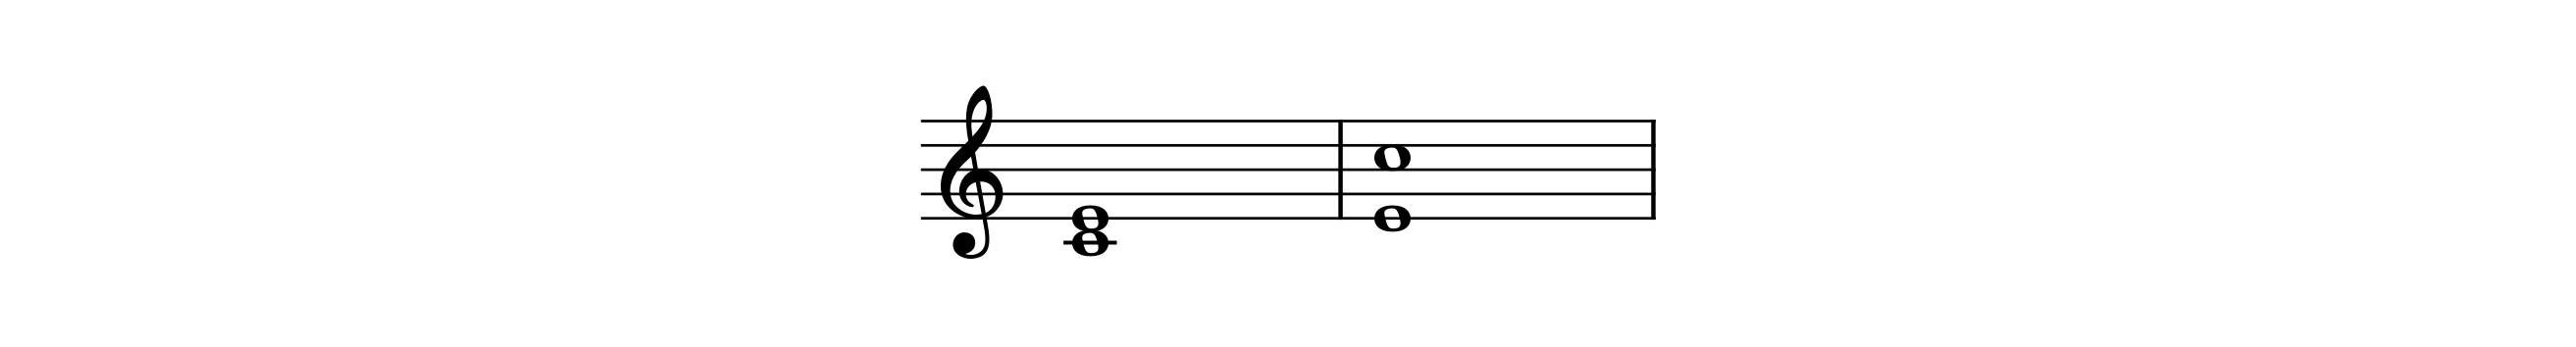

Para un acorde de tres notas las distintas disposiciones serían:

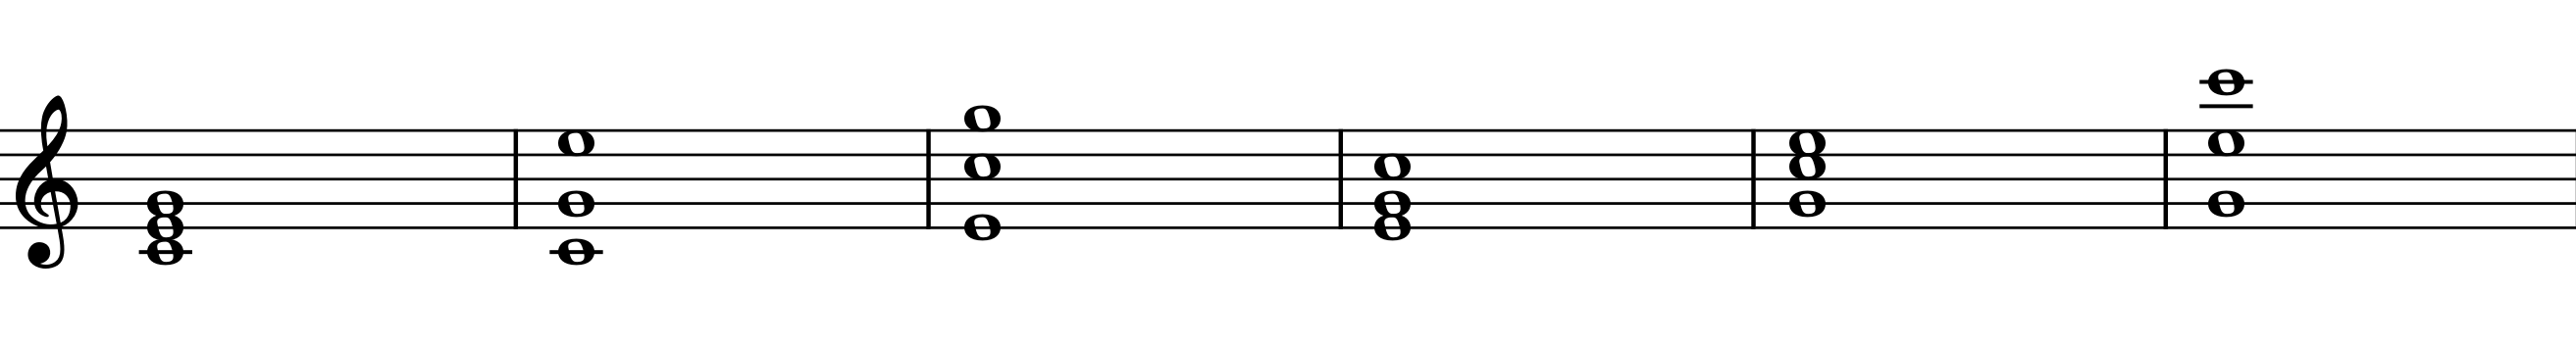

In [14]:
def test_chord_arrangements():
    assert (
        chord_arrangements(C('C', 'E'))
        == [C('C', 'E'), C('E', 'C')]
    )
    assert (
        chord_arrangements(C('C', 'E', 'G'))
        == [C('C', 'E', 'G'),
            C('C', 'G', 'E'),
            C('E', 'C', 'G'),
            C('E', 'G', 'C'),
            C('G', 'C', 'E'),
            C('G', 'E', 'C')]
    )

La lista de todas estas disposiciones no es otra cosa que la lista de
todas las permutaciones (*permutations*) posibles de sus notas, a partir
de cada una de las cuales se construye un acorde.

In [15]:
def chord_arrangements(chord: Chord) -> List[Chord]:
    return [Chord(notes) for notes in permutations(chord)]

El patrón interválico de un acorde
----------------------------------

Consideremos los siguientes ejemplos de acordes con su correspondiente
patrón interválico, de acuerdo con el análisis habitual en teoría
musical.

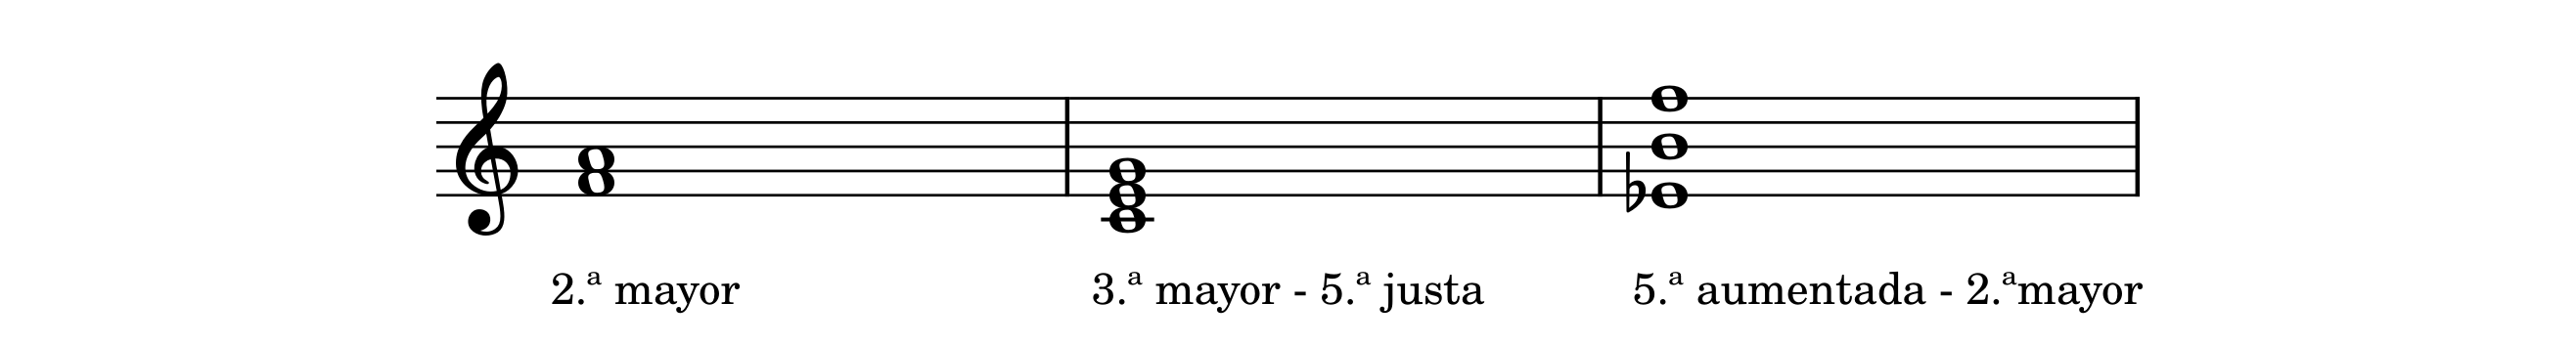

In [16]:
def test_get_chord_pattern():
    assert get_chord_pattern(C('F', 'A')) == IP('M3')
    assert get_chord_pattern(C('C', 'E', 'G')) == IP('M3', 'P5')
    assert get_chord_pattern(C('Eb', 'B', 'F')) == IP('A5', 'M2')

Es evidente que en estos análisis lo que hace el teórico de la musica es
analizar los intervalos (*analyze\_intervals*) que se forman entre el
bajo del acorde y cada una de las notas por encima de ese bajo
(*intervals\_from\_bass*).

In [17]:
def get_chord_pattern(chord: Chord) -> IntervalPattern:
    return analyze_intervals(intervals_from_bass(chord))

Lo cual genera otra lista de funciones de ayuda:

``` python
def analyze_intervals(intervals: Sequence[Interval]) -> IntervalPattern:
    pass

def intervals_from_bass(chord: Chord) -> Sequence[Interval]: 
    pass
```

Análisis de intervalos
----------------------

Naturalmente, analizar los intervalos de una serie de ellos es obtener
la secuencia que resulta del análisis de cada uno de esos intervalos:

In [18]:
def test_analyze_intervals():
    assert analyze_intervals([I('C', 'E')]) == IP('M3')
    assert analyze_intervals([I('C', 'E'), I('C', 'G')]) == IP('M3', 'P5')
    assert (
        analyze_intervals([I('C', 'E'), I('C', 'G'), I('C', 'Bb')])
        == IP('M3', 'P5', 'm7')
    )

def analyze_intervals(intervals: Sequence[Interval]) -> IntervalPattern:
    return tuple(analyze_interval(interval) for interval in intervals)

El análisis de un intervalo es, por su parte, un contenido básico en el
estudio de la teoría musical tradicional y ocupa una parte notable del
currículo de los primeros cursos en esta materia.

Analizar un intervalo consiste, como ya se comentó brevemente con
anterioridad, en determinar el *número* (*number*) y la *cualidad*
(*quality*) de ese intervalo. Esta última, a su vez, se obtiene a partir
del número del intervalo y de los semitonos (*semitones*) que median
entre las notas que lo componen.

Ahora bien, en nuestra descripción y representación del dominio asumimos
que los intervalos de octava y superiores se reducen a su versión dentro
de la octava. Dicho de otro modo, limitamos el número del intervalo a 7,
la séptima. En efecto, si se ignora la altura concreta de la nota, que
viene determinada por su nombre (letra y accidente) y por su octava, no
podemos describir apropiadamente intervalos superiores a la séptima.

La razón de esta interpretación del dominio es que en la armonía tonal
los intervalos de octava, cuando no son duplicación de una de las notas
del acorde (octava justa) y, por tanto, irrelevantes para el análisis
armónico, son intervalos que no surgen de la superposición por terceras
de las notas de ese acorde. Cualquier aparición de intervalos como la
octava disminuida o doble disminuida constituye un evento extraño al
marco teórico tonal tradicional. Su significado podría ser, ciertamente,
objeto de otro tipo más elaborado de análisis, donde tales intervalos
sean vistos, en realidad, como enarmonías de otros intervalos
comprensibles en el marco tratado, pero no son describibles tal cual en
ese mismo marco.

Algo parecido puede decirse del intervalo de novena doble disminuida. Un
intervalo tan extraño al modelo propuesto como los anteriores.

Esto significa que algunos intervalos no pueden, por principio, ser
capturados adecuadamente dentro de nuestra representación. En efecto,
tanto los intervalos de octava disminuida y doble disminuida como el de
novena doble disminuida se reducen a intervalos de unísono o segunda con
un número negativo de semitonos, algo que no tiene sentido cuando se
consideran únicamente, como en nuestro modelo, los intervalos
ascendentes —el número de semitonos de un intervalo ascendente es
siempre, por definición, un número mayor o igual que cero—.

Dicho con otras palabras, el análisis de estos intervalos peculiares, no
produce nada, el intervalo es inanalizable dentro del modelo. Los
últimos tres ejemplos del test de `analyze_interval` expresan este
hecho.

In [19]:
def test_analyze_interval():
    assert analyze_interval(I('C', 'C')) == IA('P1')
    assert analyze_interval(I('C', 'D')) == IA('M2')
    assert analyze_interval(I('C', 'E')) == IA('M3')
    assert analyze_interval(I('C', 'F')) == IA('P4')
    assert analyze_interval(I('C', 'G')) == IA('P5')
    assert analyze_interval(I('C', 'A')) == IA('M6')
    assert analyze_interval(I('C', 'B')) == IA('M7')
    assert analyze_interval(I('D', 'G')) == IA('P4')
    assert analyze_interval(I('A#', 'B')) == IA('m2')
    assert analyze_interval(I('Gb', 'D#')) == IA('AA5')
    assert analyze_interval(I('D#', 'G')) == IA('d4')
    assert analyze_interval(I('C#', 'C')) is None
    assert analyze_interval(I('Cx', 'C')) is  None
    assert analyze_interval(I('C#', 'Dbb')) is None

Como consecuencia de la anterior consideración, la función
`analyze_interval` debe contar con la posibilidad de intervalos no
analizables según la descripción realizada al principio de esta sección.

Lo cual resulta en la siguiente definición de la función:

In [20]:
def analyze_interval(interval: Interval) -> Optional[IntervalAnalysis]:
    interval_number = get_interval_number(interval)
    semitones = count_semitones(interval)
    interval_quality = get_interval_quality(interval_number, semitones)
    if not interval_quality:
        return None
    return IntervalAnalysis(interval_number, interval_quality)

Definición que genera otra lista de funciones de ayuda.

``` python
def get_interval_number(interval: Interval) -> IntervalNumber:
    pass

def count_semitones(interval: Interval) -> int:
    pass

def get_interval_quality(
    interval_number: IntervalNumber, semitones: int
) -> Optional[IntervalQuality]:
    pass
```

Número de intervalo
-------------------

El número del intervalo se obtiene a partir de la distancia entre las
letras de sus notas (*letter distance*), sin consideración de las
alteraciones que cada una de esas notas pudiera tener.

Puesto que a cada letra se le asigna un número del 0 a 6:

| letra | número de letra |
|-------|-----------------|
| C     | 0               |
| D     | 1               |
| E     | 2               |
| F     | 3               |
| G     | 4               |
| A     | 5               |
| B     | 6               |

la distancia entre las letras se puede calcular mediante una resta. Así,
por ejemplo, la distancia entre C y F sería $3 - 0 = 3$, la distancia en
E y G sería $4 - 2 = 2$. Ahora bien, cuando en la lista anterior la
letra de la nota más aguda está por debajo de la letra de la nota más
grave, por ejemplo, A respecto de D, tendríamos, sin embargo,
$1 - 5 = -4$, en lugar de la distancia esperada, $3$. Obtener la
distancia esperada resulta sencillo si aplicamos aritmética modular. La
distancia entre las letras sería, pues:

$$(n_2 - n_1) \bmod 7$$

donde $n_2$ es la letra de la nota más aguda (*high*) y $n_1$ la de la
más grave (*low*).

Finalmente, se observará que a la distancia entre letras hay que sumar 1
para obtener el número del intervalo, ya que los números de intervalos
empiezan con 1 en lugar de con 0.

In [21]:
def test_get_interval_number():
    assert get_interval_number(I('C', 'C')) == 1
    assert get_interval_number(I('C', 'F')) == 4
    assert get_interval_number(I('E', 'G')) == 3
    assert get_interval_number(I('A', 'D')) == 4

def get_interval_number(interval: Interval) -> IntervalNumber:
    low_letter = interval.low.letter
    high_letter = interval.high.letter
    interval_number = letter_distance(low_letter, high_letter) + 1
    return cast(IntervalNumber, interval_number)

def test_letter_distance():
    assert letter_distance('C', 'C') == 0
    assert letter_distance('C', 'F') == 3
    assert letter_distance('E', 'G') == 2
    assert letter_distance('A', 'D') == 3

def letter_distance(letter1: Letter, letter2: Letter) -> int:
    return (letter_number(letter2) - letter_number(letter1)) % 7

Por otro lado, para obtener el número que corresponde a cada letra se
puede aprovechar el hecho de que las letras y, en concreto, los
caracteres ASCII (los caracteres sin signos diacríticos) ya tienen
asociado un número ordinal (*ord*), correspondiente a su posición en la
tabla de caracteres ASCII. Nuestras letras de notas ocupan, en concreto,
las siguientes posiciones en la tabla ASCII:

| carácter ASCII | número ASCII |
|----------------|--------------|
| A              | 65           |
| B              | 66           |
| C              | 67           |
| D              | 68           |
| E              | 69           |
| F              | 70           |
| G              | 71           |

Es fácil deducir que la fórmula siguiente, donde $n$ representa la letra
de la nota cuyo número se quiere obtener, produce los números
convencionales de notas a partir de su ordinal en la tabla ASCII:

$$(ord(n) - ord(C)) \bmod 7$$

In [22]:
def test_letter_number():
    assert letter_number('C') == 0
    assert letter_number('D') == 1
    assert letter_number('E') == 2
    assert letter_number('F') == 3
    assert letter_number('G') == 4
    assert letter_number('A') == 5
    assert letter_number('B') == 6

def letter_number(letter: Letter) -> LetterNumber:
    number = (ord(letter) - ord('C')) % 7
    return cast(LetterNumber, number)

Número de semitonos
-------------------

El número de semitonos entre dos notas puede calcularse de varias
formas. Una de ellas, la que aplicaremos en nuestra implementación, hace
uso de la idea de *clase de altura* (*pitchclass*). En teoría musical,
de la misma forma que se asigna un número del 0 al 6 a las siete notas
de la escala diatónica de do mayor, es convención comunmente aceptada
asignar un número a cada una de las doce posibles clases de altura. Ese
número representa de forma unívoca dicha clase.

Las clases de altura son todas las notas cromáticas comprendidas en una
octava. La lista siguiente muestra dichas clases con el número que
convencionalmente se asigna a cada una de ellas:

| nota      | clase de altura |
|-----------|-----------------|
| C         | 0               |
| C$\sharp$ | 1               |
| D         | 2               |
| D$\sharp$ | 3               |
| E         | 4               |
| F         | 5               |
| F$\sharp$ | 6               |
| G         | 7               |
| G$\sharp$ | 8               |
| A         | 9               |
| A$\sharp$ | 10              |
| B         | 11              |

Conviene aclarar que el número de las clases de altura de la notas
alteradas es el mismo cuando la altura es una enarmonía de aquella que
consta en la lista anterior. Así, por ejemplo, las notas D$\flat$ y
C$\sharp$ pertenecen a la misma clase de altura.

Si recordamos cómo hemos obtenido la distancia entre letras de notas, es
evidente que el cómputo de los semitonos entre dos notas se puede
obtener por una operación de resta semejante, y que, al igual que
sucedía con el cálculo de la distancia entre letras, es necesario
aplicar aritmética modular para obtener el resultado correcto cuando la
clase de altura de la nota más grave aparece en la lista anterior
después de la clase de altura de la nota más aguda. El módulo ahora
será, claro está, 12 y no 7, puesto que el número de clases de altura
posibles es 12. El número de semitonos se puede, pues, calcular del
siguiente modo, donde $pc_1$ y $pc_2$ son las clases de altura de las
notas más aguda y más grave, respectivamente:

$$(pc_2 - pc_1) \bmod 12$$

In [23]:
def test_count_semitones():
    assert count_semitones(I('C', 'C')) == 0
    assert count_semitones(I('C', 'D#')) == 3
    assert count_semitones(I('Bb', 'F')) == 7
    assert count_semitones(I('G', 'B')) == 4
    assert count_semitones(I('Ax', 'Gb')) == 7

def count_semitones(interval: Interval) -> int:
    pitchclass_low = get_pitchclass(interval.low)
    pitchclass_high = get_pitchclass(interval.high)
    return (pitchclass_high - pitchclass_low) % 12

Obsérvese ahora la relación que existe entre el número de la letra de
una nota (el número asignado a las siete notas naturales) y su clase de
altura, cuando la altura no esta alterada:

| letra | número de la letra | clase de altura |
|-------|--------------------|-----------------|
| C     | 0                  | 0               |
| D     | 1                  | 2               |
| E     | 2                  | 4               |
| F     | 3                  | 5               |
| G     | 4                  | 7               |
| A     | 5                  | 9               |
| B     | 6                  | 11              |

Es fácil colegir que cuando el número de la letra es menor que 3, la
clase de altura es igual al doble del número de letra, mientras que
cuando es mayor o igual que 3, la clase de altura es igual al doble del
número de letra menos 1. Esto es, la clase de altura ($pc$) de una letra
de número $n$ obedece la siguiente ecuación:

$$pc = \begin{cases}%
  2n, & n < 3 \\
  2n - 1, & n \geq 3
\end{cases}$$

Si la nota está alterada, se añade o resta la desviación (*offset*)
positiva o negativa en semitonos que implica esa alteración con respecto
a la nota no alterada.

Finalmente, puesto que no hay más que doce clases de altura, debemos aplicar
aritmética modular (con módulo 12) para que la operación anterior, tras la
adición de la desviación en semitonos, no produzca un resultado fuera del
rango 0--11. Lo cual proporciona la clase de altura esperada para las notas
C$\flat$ y B$\sharp$, 11 y 0, respectivamente.

In [24]:
def test_get_pitchclass():
    assert get_pitchclass(N('C')) == 0
    assert get_pitchclass(N('C#')) == 1
    assert get_pitchclass(N('D')) == 2
    assert get_pitchclass(N('D#')) == 3
    assert get_pitchclass(N('E')) == 4
    assert get_pitchclass(N('F')) == 5
    assert get_pitchclass(N('F#')) == 6
    assert get_pitchclass(N('G')) == 7
    assert get_pitchclass(N('G#')) == 8
    assert get_pitchclass(N('A')) == 9
    assert get_pitchclass(N('A#')) == 10
    assert get_pitchclass(N('B')) == 11
    assert get_pitchclass(N('Cb')) == 11
    assert get_pitchclass(N('B#')) == 0
    
def get_pitchclass(note: Note) -> Pitchclass:
    letter_num = letter_number(note.letter)
    offset = get_accidental_offset(note.accidental)
    if letter_num < 3:
        pitchclass = (letter_num * 2 + offset) % 12
    else:
        pitchclass = (letter_num * 2 - 1 + offset) % 12
    return cast(Pitchclass, pitchclass)

def test_get_accidental_offset():
    assert get_accidental_offset('double_flat') == -2
    assert get_accidental_offset('flat') == -1
    assert get_accidental_offset('natural') == 0
    assert get_accidental_offset('sharp') == 1
    assert get_accidental_offset('double_sharp') == 2

def get_accidental_offset(accidental: Accidental) -> int:
    return ACCIDENTAL_OFFSETS[accidental]

Cualidad del intervalo
----------------------

En teoría de la música se asigna a un intervalo una cualidad dependiendo
de su número y del número de semitonos entre las notas que lo componen.

En concreto, todos los intervalos, independientemente de su número,
pueden ser disminuidos o aumentados, o doble disminuidos y doble
aumentados. Sin embargo, sólo los intervalos de unísono, cuarta y quinta
pueden ser justos, pero no mayores o menores; mientras que los de
segunda, tercera, sexta y séptima pueden ser mayores o menores, pero no
justos. Hecha esta primera aclaración, la determinación concreta de la
cualidad que corresponde a un intervalo dado depende del número de
semitonos entre sus notas.

Así, por ejemplo, se dice que el intervalo de tercera entre C y E es
*mayor*, porque consta de 4 semitonos; que el intervalo de segunda entre
C y E$\flat$ es *menor*, por consta de 3 semitonos; que entre B y F, 6
semitonos, hay una quinta disminuida; mientras que entre C y G, 7
semitonos, hay una quinta justa; etcétera.

La tabla de estas relaciones se formuló anteriormente en
[`INTERVAL_QUALITIES`](#interval-qualities).

Obtener la cualidad es, por consiguiente, extraerla de esa tabla. Eso
sí, puesto que nuestra implementación no permite un número negativo de
semitonos, aquellos valores que en la tabla aparecen como tales
corresponden a los intervalos no analizables discutidos en la sección
[*Análisis de intervalos*](#sec:interval-analysis), cuya cualidad no
puede determinarse.

In [25]:
def test_get_interval_quality():
    assert get_interval_quality(3, 4) == 'major'
    assert get_interval_quality(2, 1) == 'minor'
    assert get_interval_quality(4, 6) == 'augmented'
    assert get_interval_quality(7, 9) == 'diminished'
    assert get_interval_quality(3, 6) == 'double_augmented'
    assert get_interval_quality(7, 8) == 'double_diminished'
    assert get_interval_quality(5, 7) == 'perfect'

def get_interval_quality(
    interval_number: IntervalNumber, semitones: int
) -> Optional[IntervalQuality]:
    try:
        quality = INTERVAL_QUALITIES[interval_number][semitones]
    except KeyError:
        return None
    return quality

Intervalos desde el bajo
------------------------

Las secciones precedentes muestran la implementación de la función
`analyze_intervals` y de todas sus funciones suplementarias. El objetivo
—recordemos— es obtener el patrón interválico de un acorde dado. La
pieza que falta para obtener ese patrón es la función
`intervals_from_bass` que es la responsable de producir la secuencia de
intervalos entre el bajo del acorde y el resto de sus notas, secuencia a
la que se aplicará `analyze_intervals` para obtener el patrón
interválico del acorde.

Obtener los intervalos que el bajo (*bass*) de un acorde forma con sus
notas superiores (*upper notes*) es equivalente a obtener el producto
cartesiano de los conjuntos formados por su bajo y por sus notas
superiores. Expresado matemáticamente y tomando las letras de las notas
como elementos,

$$\{C\} \times \{E, G\} = \{(C, E), (C, G)\}$$

donde el bajo es, naturalmente, la primera nota, la más grave, del
acorde.

In [26]:
def test_intervals_from_bass():
    assert intervals_from_bass(C('C', 'F')) == [I('C', 'F')]
    assert (
        intervals_from_bass(C('C', 'E', 'G'))
        == [I('C', 'E'), I('C', 'G')]
    )
    assert (
        intervals_from_bass(C('E', 'G', 'C'))
        == [I('E', 'G'), I('E', 'C')]
    )

def intervals_from_bass(chord: Chord) -> Sequence[Interval]:
    bass = get_bass(chord)
    notes_above_bass = chord[1:]
    return [Interval(bass, note) for note in notes_above_bass]

def test_get_bass():
    assert get_bass(C('C', 'E', 'G')) == N('C')
    assert get_bass(C('E', 'C', 'G')) == N('E')
    assert get_bass(C('G', 'E', 'C')) == N('G')

def get_bass(chord: Chord) -> Note:
    return chord[0]

Inversión del acorde
--------------------

Como ya se comentó en la primera parte de esta exposición, la inversión
de un acorde depende de la relación entre su fundamental y su bajo.

Podemos expresar esta relación de forma puramente numérica, donde en la
columna izquierda aparece el número del intervalo fundamental–bajo y en
la derecha la inversión.

| intervalo fundamental–bajo | inversión |
|----------------------------|-----------|
| 1                          | 0         |
| 3                          | 1         |
| 5                          | 2         |
| 7                          | 3         |
| 2                          | 4         |
| 4                          | 5         |
| 6                          | 6         |

Esta relación puede modelarse mediante la siguiente fórmula matemática,
donde $V$ es la inversión e $i$ el intervalo entre fundamental y bajo:

$$V = \begin{cases}%
  \lfloor \frac{i}{2} \rfloor, & i_{impar} \\
  \lfloor \frac{i + 7}{2} \rfloor, & i_{par}
\end{cases}$$

Por ejemplo, la inversión de un acorde cuyo bajo está a distancia de
quinta de su fundamental —distancia impar (*odd*)— se obtiene mediante
la operación:

$$\dfrac{5}{2} = 2.5,$$

cuya parte entera es $2$.

Sin embargo, en el caso de un acorde cuyo bajo está a distancia par, por
ejemplo, a una segunda de la fundamental, la operación sería:

$$\dfrac{2 + 7}{2} = 4.5,$$

cuya parte entera es $4$.

Añadir 7 en el caso de los intervalos pares entre fundamental y bajo es
consecuencia de que nuestros intervalos se presentan reducidos al ámbito
de una octava. El 7 restituye dicho intervalo a su dimensión original no
reducida: los intervalos pares citados, eliminada la reducción al ámbito
de la octava, son en realidad intervalos de novena, oncena y trecena.

In [27]:
def test_get_inversion():
    assert get_inversion(N('C'), N('C')) == 0
    assert get_inversion(N('C'), N('E')) == 1
    assert get_inversion(N('C'), N('G')) == 2
    assert get_inversion(N('C'), N('B')) == 3
    assert get_inversion(N('C'), N('D')) == 4
    assert get_inversion(N('C'), N('F')) == 5
    assert get_inversion(N('C'), N('A')) == 6

def get_inversion(root: Note, bass: Note) -> ChordInversion:
    def is_odd(num):
        return num % 2 != 0
    interval_number = get_interval_number(Interval(root, bass))
    if is_odd(interval_number):
        inversion = interval_number // 2
    else:
        inversion = (interval_number + 7) // 2
    return cast(ChordInversion, inversion)

Categoría del acorde
--------------------

La tabla [`CHORD_CATEGORIES`](#chord-categories) asocia un patrón
interválico a un nombre de categoría común de acorde. Obtener ese nombre
de categoría (`get_category`) es, simplemente, extraerlo de esa tabla, a
partir del patrón interválico dado.

In [28]:
def test_get_category():
    assert get_category(MAJOR) == 'major'
    assert get_category(DIMINISHED_SEVENTH) == 'diminished_seventh'

def get_category(interval_pattern: IntervalPattern) -> ChordCategory:
    return CHORD_CATEGORIES[interval_pattern]

Símbolo del acorde
------------------

Es práctica habitual en teoría de la música *cifrar* los acordes, esto
es, asignarles un nombre corto o una cifra numérica para describirlos
brevemente.

Hay varios cifrados actualmente en uso. El que hemos elegido para
nuestra implementación es el llamado *cifrado americano* o también *lead
sheet*. Este cifrado compendia en una única cifra el nombre de la
fundamental del acorde, su categoría y su bajo. La cifra sigue la
siguiente sintaxis:

    <nombre de la fundamental><categoría>[/<bajo>]

Los paréntesis cuadrados indican que la última expresión puede o no
aparecer. En efecto, cuando el bajo y la fundamental son la misma nota,
esa parte se omite.

A su vez, las categorías de los acordes se cifran siguiendo ciertas
convenciones. La tabla de los símbolos elegidos para nuestra
implementación aparece formalizada en
[`CHORD_CATEGORY_SYMBOLS`](#category-symbols).

El objetivo es pues componer (*build*) la cifra del acorde a partir de
su fundamental, su categoría y su bajo. Si el bajo coincide con la
fundamental la etiqueta del bajo se omite.

Veamos algunos ejemplos:

-   fundamental: `C`; categoría: `major`; bajo: `C`; símbolo del acorde:
    `C`.
-   fundamental: `C`; categoría: `minor`; bajo: `Eb`; símbolo del
    acorde: `E-/C`.
-   fundamental: `E`; categoría: `half_diminished`; bajo: `Bb`; símbolo
    del acorde: `E-7b5/Bb`.

In [29]:
def test_build_chord_symbol():
    assert build_chord_symbol(N('C'), 'major', N('C')) == 'C'
    assert build_chord_symbol(N('C'), 'minor', N('Eb')) == 'C-/Eb'
    assert (
        build_chord_symbol(N('E'), 'half_diminished', N('Bb'))
        == 'E-7b5/Bb'
    )

Puesto que en la composición de la cifra del acorde debemos utilizar
símbolos, esto es, cadenas de caracteres (*string*) correspondientes a
cada uno de los tres componentes (nota fundamental, categoría del acorde
y nota del bajo), es necesario invocar funciones auxiliares que
produzcan tales cadenas o, en el caso del bajo, si éste coincide con la
fundamental, un cadena vacía.

La cadena de caracteres correspondiente a una nota se puede obtener
fácilmente concatenando la letra de la nota y el símbolo que corresponde
a su accidente, el cual se puede obtener consultando la tabla
[`ACCIDENTAL_SYMBOLS`](#accidental-symbols).

Por su parte, el símbolo de la categoría se obtiene de manera inmediata
a partir de la tabla [`CHORD_CATEGORY_SYMBOLS`](#category-symbols).

In [30]:
def build_chord_symbol(
    root: Note, category: ChordCategory, bass: Note
) -> str:
    root_symbol = note_to_string(root)
    category_symbol = get_category_symbol(category)
    bass_symbol = f'/{note_to_string(bass)}' if root != bass else ''
    return f'{root_symbol}{category_symbol}{bass_symbol}'

def test_note_to_string():
    assert note_to_string(N('C')) == 'C'
    assert note_to_string(N('Eb')) == 'Eb'
    assert note_to_string(N('Ax')) == 'Ax'

def note_to_string(note: Note) -> str:
    return f'{note.letter}{get_accidental_symbol(note.accidental)}'

def test_get_accidental_symbol():
    assert get_accidental_symbol('double_flat') == 'bb'
    assert get_accidental_symbol('flat') == 'b'
    assert get_accidental_symbol('natural') == ''
    assert get_accidental_symbol('sharp') == '#'
    assert get_accidental_symbol('double_sharp') == 'x'

def get_accidental_symbol(accidental: Accidental) -> str:
    return ACCIDENTAL_SYMBOLS[accidental]

def test_get_category_symbol():
    assert get_category_symbol('major') == ''
    assert get_category_symbol('minor') == '-'
    assert get_category_symbol('augmented') == '+'
    assert get_category_symbol('diminished') == '-b5'
    assert get_category_symbol('half_diminished') == '-7b5'
    assert get_category_symbol('dominant_seventh') == '7'
    assert get_category_symbol('major_seventh') == 'maj7'
    assert get_category_symbol('minor_seventh') == '-7'
    assert get_category_symbol('diminished_seventh') == 'o'
    assert get_category_symbol('suspended_fourth') == 'sus4'
    assert get_category_symbol('suspended_second') == 'sus2'

def get_category_symbol(category: ChordCategory) -> str:
    return CHORD_CATEGORY_SYMBOLS[category]

Apéndice I. Un ejemplo real de análisis de acordes
==================================================

Un resultado interesante se produce si aplicamos nuestro programa a un
caso de música real.

La pieza de la página siguiente es el op. 35 n.º 9 de Fernando Sor para
guitarra sola [5].

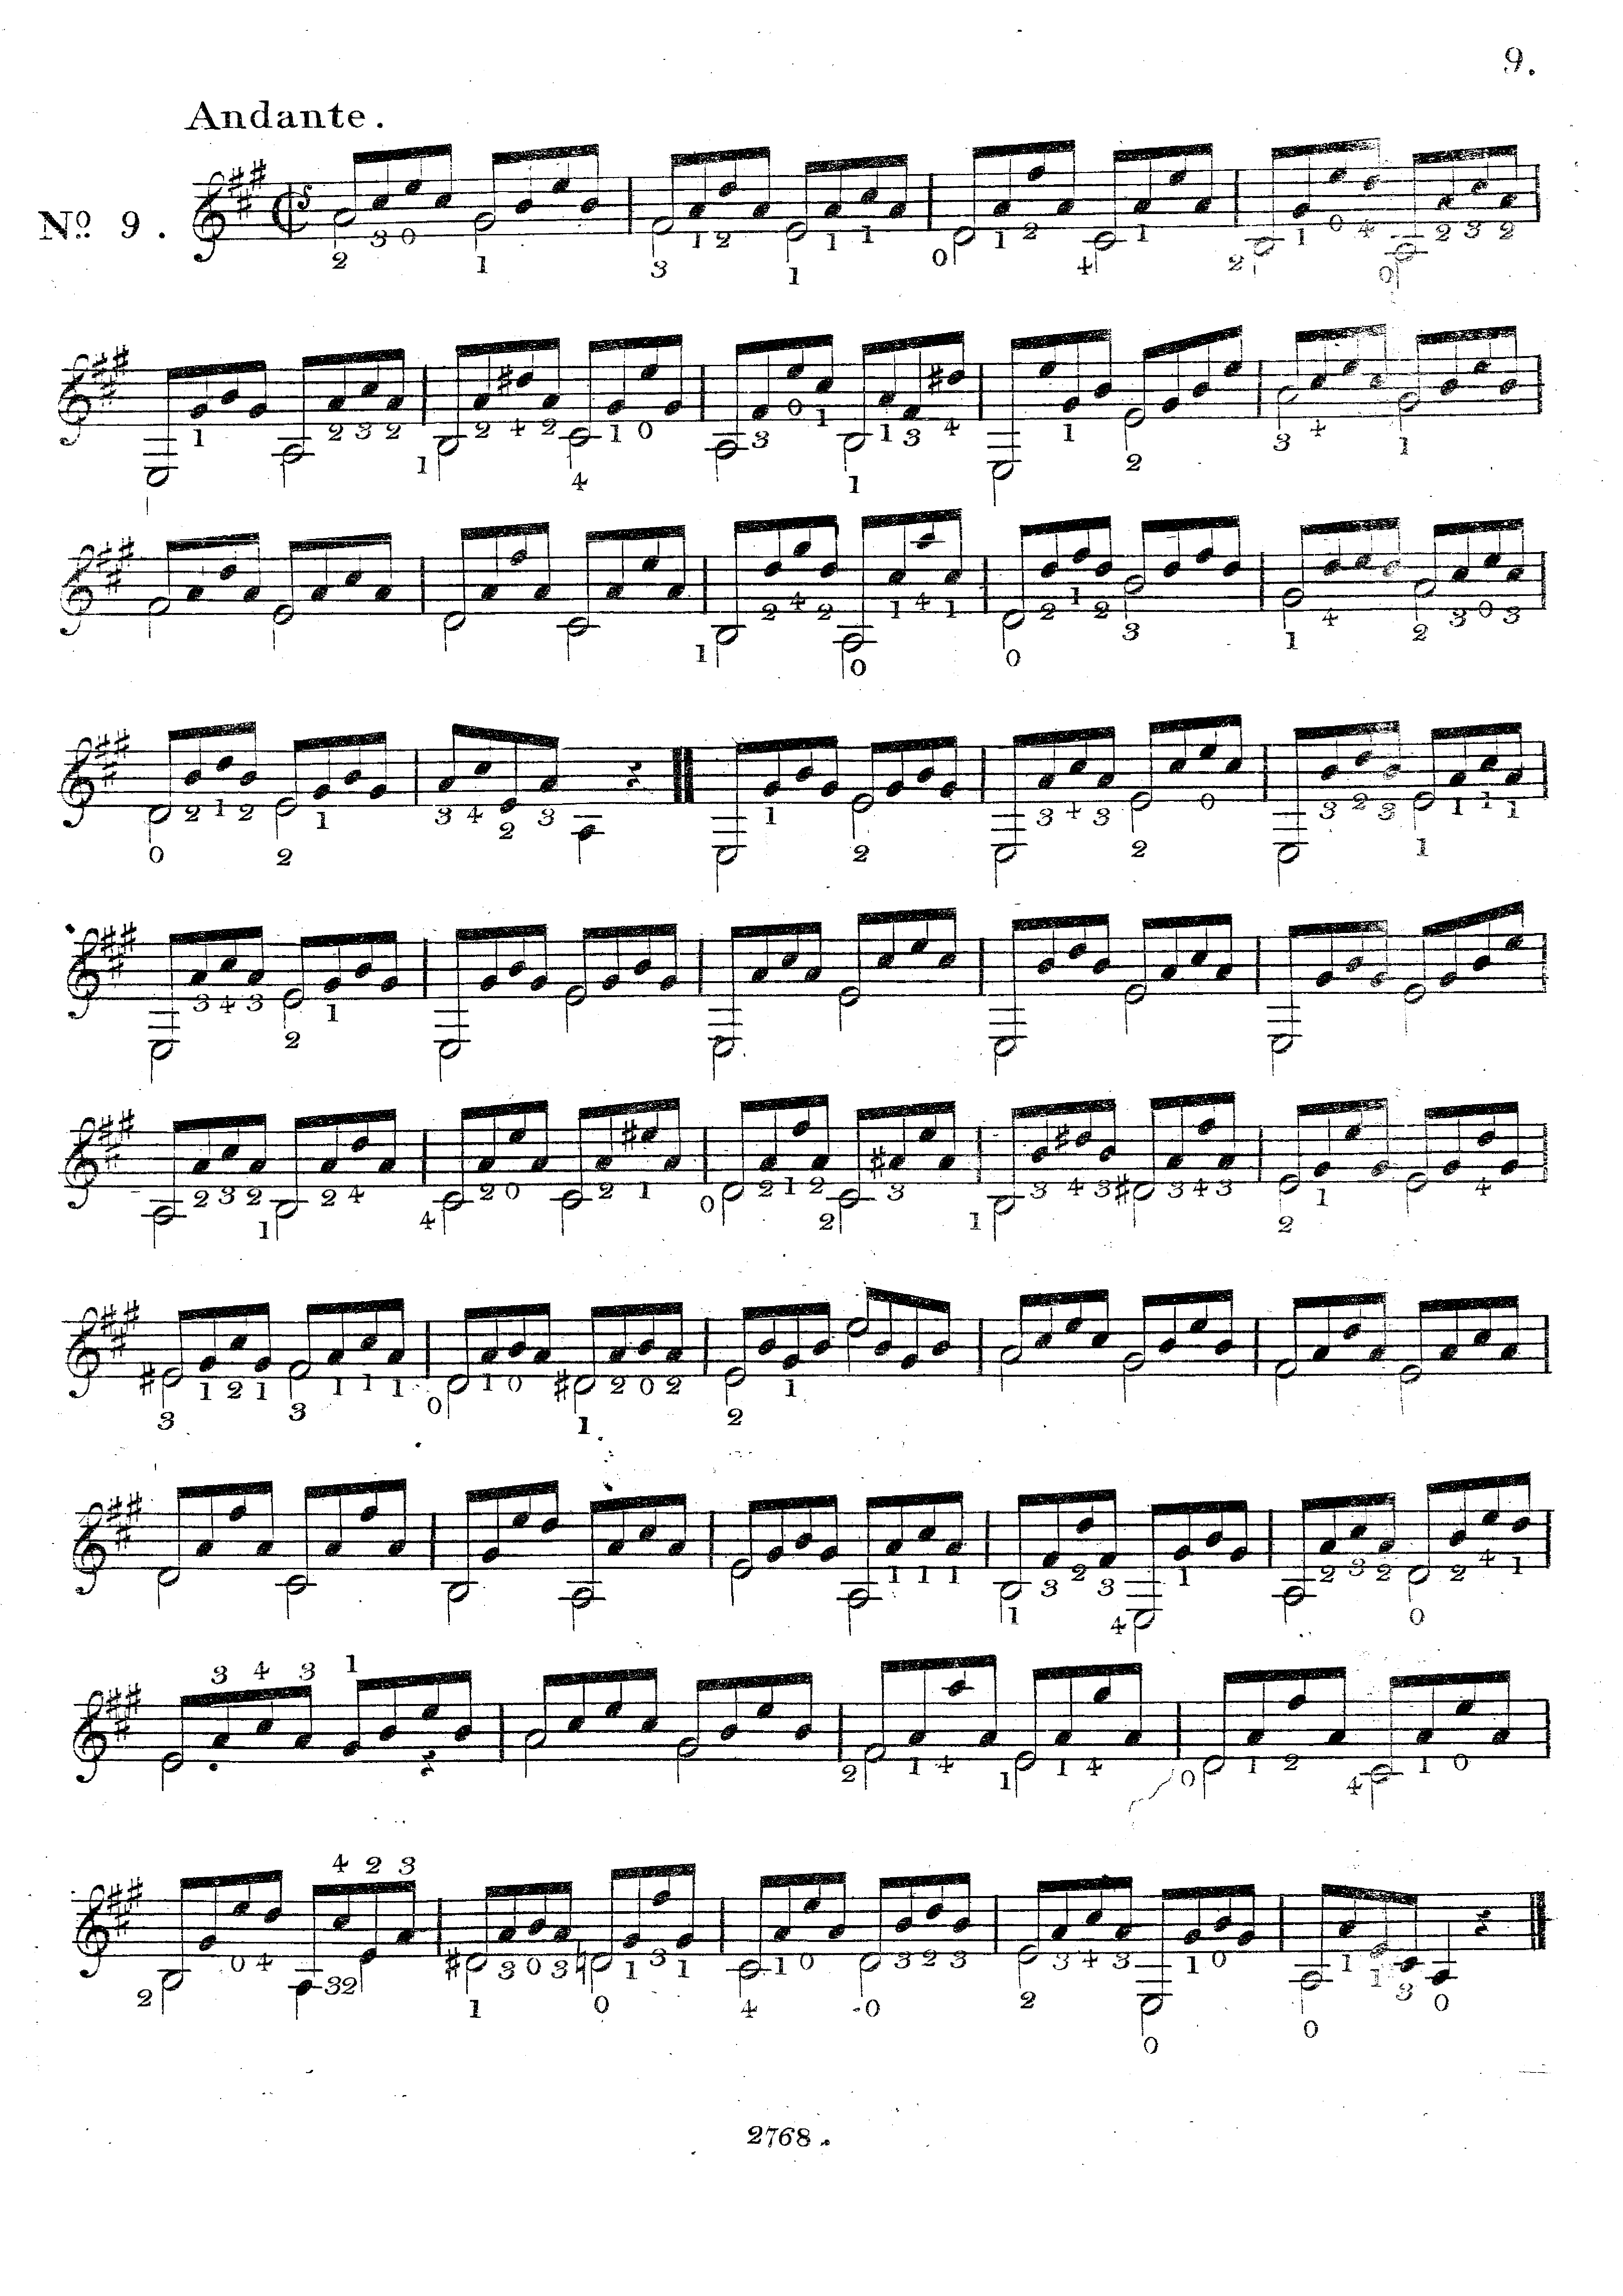

Se puede transcribir a nuestra representación de acordes como se muestra a 
continuación ---por brevedad, he suprimido las notas repetidas en cada
arpegio---. Si se ejecuta la función definida tras la transcripción, que
aplica `analyze_chord` a cada uno de los acordes de la pieza y devuelve una
representación resumida de sus análisis, se obtiene el resultado que se
muestra al final de la sección. Nótese que cuando el análisis de un acorde se
topa con un acorde desconocido por nuestra implementación, ello se indica 
con ‘`?`’.

In [31]:
if __name__ == '__main__':
    # Real example of chord analysis
    SOR_35_9 = [
        C('A', 'C#', 'E'),
        C('G#', 'B', 'E'),
        C('F#', 'A', 'D'),
        C('E', 'A', 'C#'),
        C('D', 'A', 'F#'),
        C('C#', 'A', 'E'),
        C('B', 'G#', 'E', 'D'),
        C('A', 'C#'),
        C('E', 'G#', 'B'),
        C('A', 'C#'),
        C('B', 'A', 'D#'),
        C('C#', 'G#', 'E'),
        C('A', 'F#', 'C#', 'E'),
        C('B', 'F#', 'A', 'D#'),
        C('E', 'G#', 'B', 'E'),
        C('E', 'G#', 'B', 'E'),
        C('A', 'C#', 'E'),
        C('G#', 'B', 'E'),
        C('F#', 'A', 'D'),
        C('E', 'A', 'C#'),
        C('D', 'A', 'F#'),
        C('C#', 'A', 'E'),
        C('B', 'D', 'G#'),
        C('A', 'C#'),
        C('D', 'F#'),
        C('B', 'D', 'F#'),
        C('G#', 'D', 'E'),
        C('A', 'C#', 'E'),
        C('D', 'B'),
        C('E', 'G#', 'B'),
        C('A', 'E', 'C#'),
        C('E', 'G#', 'B'),
        C('E', 'G#', 'B'),
        C('E', 'A', 'C#'),
        C('E', 'C#'),
        C('E', 'B', 'D'),
        C('E', 'A', 'C#'),
        C('E', 'A', 'C#'),
        C('E', 'G#', 'B'),
        C('E', 'G#', 'B'),
        C('E', 'G#', 'B'),
        C('E', 'A', 'C#'),
        C('E', 'C#'),
        C('E', 'B', 'D'),
        C('E', 'A', 'C#'),
        C('E', 'G#', 'B'),
        C('E', 'G#', 'B'),
        C('A', 'C#'),
        C('B', 'A', 'D'),
        C('C#', 'A', 'E'),
        C('C#', 'A', 'E#'),
        C('D', 'A', 'F#'),
        C('C#', 'A#', 'E'),
        C('B', 'D#'),
        C('D#', 'A', 'F#'),
        C('E', 'G#'),
        C('E', 'G#', 'D'),
        C('E#', 'G#', 'C#'),
        C('F#', 'A', 'C#'),
        C('D', 'A', 'B'),
        C('D#', 'A', 'B'),
        C('E', 'G#', 'B'),
        C('A', 'C#', 'E'),
        C('G#', 'B', 'E'),
        C('F#', 'A', 'D'),
        C('E', 'A', 'C#'),
        C('D', 'A', 'F#'),
        C('C#', 'A', 'E'),
        C('B', 'G#', 'E', 'D'),
        C('A', 'C#'),
        C('E', 'G#', 'B'),
        C('A', 'C#'),
        C('B', 'F#', 'D'),
        C('E', 'G#', 'B'),
        C('A', 'C#'),
        C('D', 'B', 'E'),
        C('E', 'A', 'C#'),
        C('G#', 'B', 'E'),
        C('A', 'C#', 'E'),
        C('G#', 'B', 'E'),
        C('F#', 'A'),
        C('E', 'A', 'G#'),
        C('D', 'A', 'F#'),
        C('C#', 'A', 'E'),
        C('B', 'G#', 'D', 'E'),
        C('A', 'E', 'C#'),
        C('D#', 'A', 'B'),
        C('D', 'G#', 'F#'),
        C('C#', 'A', 'E'),
        C('D', 'B'),
        C('E', 'A', 'C#'),
        C('E', 'G#', 'B'),
        C('A', 'C#', 'E')
    ]

    def show_piece_analysis(piece: Sequence[Chord]) -> None:
        def show_chord(chord: Chord) -> str:
            notes_str = ', '.join([note_to_string(n) for n in chord])
            return f"Chord({notes_str})"
        def show_chord_symbol(analysis: Sequence[ChordAnalysis]) -> str:
            match analysis:
                case []:
                    symbol = '?'
                case [*ans]:
                    symbol = '|'.join([a['symbol'] for a in ans])
            return symbol
        chord_hdr = 'CHORD'
        analysis_hdr = 'ANALYSIS'
        print(f"{chord_hdr:<30}{analysis_hdr}")
        for chord in piece:
            analysis = analyze_chord(chord)
            chord_str = show_chord(chord)
            analysis_str = show_chord_symbol(analysis)
            print(f"{chord_str:<30}{analysis_str}")

    show_piece_analysis(SOR_35_9)

CHORD                         ANALYSIS
Chord(A, C#, E)               A
Chord(G#, B, E)               E/G#
Chord(F#, A, D)               D/F#
Chord(E, A, C#)               A/E
Chord(D, A, F#)               D
Chord(C#, A, E)               A/C#
Chord(B, G#, E, D)            E7/B
Chord(A, C#)                  A
Chord(E, G#, B)               E
Chord(A, C#)                  A
Chord(B, A, D#)               B7
Chord(C#, G#, E)              C#-
Chord(A, F#, C#, E)           F#-7/A
Chord(B, F#, A, D#)           B7
Chord(E, G#, B)               E
Chord(E, G#, B)               E
Chord(A, C#, E)               A
Chord(G#, B, E)               E/G#
Chord(F#, A, D)               D/F#
Chord(E, A, C#)               A/E
Chord(D, A, F#)               D
Chord(C#, A, E)               A/C#
Chord(B, D, G#)               G#-b5/B
Chord(A, C#)                  A
Chord(D, F#)                  D
Chord(B, D, F#)               B-
Chord(G#, D, E)               E7/G#
Chord(A, C#, E)               A
Chord(D, B)         

Apéndice II. Diagrama de las funciones definidas
================================================

La jerarquía de las funciones utilizadas en el código se puede
esquematizar mediante un diagrama. El tronco arranca en la función
principal. Cada rama representa las funciones auxiliares requeridas por
una función jerárquicamente superior. La etiqueta `(*)` indica que la
función asociada fue definida previamente, esto es, aparece antes en el
diagrama. Se excluyen las funciones para la creación rápida de ejemplos.

    analyze_chord
    |--- chord_arrangements
    |--- get_chord_pattern
    |    |--- analyze_intervals
    |    |    |--- analyze_interval
    |    |         |--- get_interval_number
    |    |         |    |--- letter_distance
    |    |         |         |--- letter_number
    |    |         |--- count_semitones
    |    |         |    |--- get_pitchclass
    |    |         |         |--- letter_number (*)
    |    |         |         |--- get_accidental_offset
    |    |         |--- get_interval_quality
    |    |--- intervals_from_bass
    |         |--- get_bass
    |--- get_bass (*)
    |--- get_inversion
    |    |--- get_interval_number (*)
    |--- get_category
    |--- build_chord_symbol
         |--- note_to_string
         |    |--- get_accidental_symbol
         |--- get_category_symbol

El código siguiente expone ordenadamente estas mismas funciones en forma
de *stubs*:

``` python
def analyze_chord(chord: Chord) -> Sequence[ChordAnalysis]:
    pass

def chord_arrangements(chord: Chord) -> List[Chord]:
    pass

def get_chord_pattern(chord: Chord) -> IntervalPattern:
    pass

def analyze_intervals(intervals: Sequence[Interval]) -> IntervalPattern:
    pass

def analyze_interval(interval: Interval) -> Optional[IntervalAnalysis]:
    pass

def get_interval_number(interval: Interval) -> IntervalNumber:
    pass

def letter_distance(letter1: Letter, letter2: Letter) -> int:
    pass

def letter_number(letter: Letter) -> LetterNumber:
    pass

def count_semitones(interval: Interval) -> int:
    pass

def get_pitchclass(note: Note) -> Pitchclass:
    pass

def get_accidental_offset(accidental: Accidental) -> int:
    pass

def get_interval_quality(
    interval_number: IntervalNumber, semitones: int
) -> Optional[IntervalQuality]:
    pass

def intervals_from_bass(chord: Chord) -> Sequence[Interval]:
    pass

def get_bass(chord: Chord) -> Note:
    pass

def get_inversion(root: Note, bass: Note) -> ChordInversion:
    pass

def get_category(interval_pattern: IntervalPattern) -> ChordCategory:
    pass

def build_chord_symbol(
root: Note, category: ChordCategory, bass: Note)
-> str:
    pass

def note_to_string(note: Note) -> str:
    pass

def get_accidental_symbol(accidental: Accidental) -> str:
    pass

def get_category_symbol(category: ChordCategory) -> str:
    pass
```

[1] Este documento se publica bajo una licencia [CC BY-NC-SA
4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) (Luis Sanjuán 
 2023).

[2] [HtDP/2e](https://htdp.org/).

[3] Entre paréntesis aparecerán las traducciones al inglés de las
palabras clave. La razón es que el código presentado está escrito en
inglés. El inglés es el lenguaje internacional de la programación y,
aunque es válido escribir el código en otras lenguas, es preferible,
siempre que se pueda, hacerlo en inglés, con el fin de que cualquier
persona, independientemente de su país de origen, puede entender
nuestros programas.

[4] El enunciado `pass` sirve para completar temporalmente, de un modo
sintácticamente correcto, la definición de cada una de esas funciones.
Ese enunciado será luego sustituido por la implementación de la función.

[5] Fuente: [Sor, op. 35](https://imslp.org/wiki/Special:ReverseLookup/200500).

In [32]:
# Running tests on Jupyter Notebook
ipytest.autoconfig()
ipytest.run()
ipytest.clean()

.............................                                                                [100%]
29 passed in 0.17s
